In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousePrices.csv')
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  Property_Sale_Price  
0       0      2   2008        WD         Normal               208500  
1       0      5   2007        WD         Normal               181500  
2       0      9   2008        WD         Normal               223500  
3       0      2   2006        WD        Abnorml               140000  
4       0     12   2008        WD         Normal               250000  

[5 rows x 81 columns]

In [3]:
df.shape

(2073, 81)

#### Objective: Generate a Regression Model to predict the price of the property

In [4]:
# Data preporcessing 
#1) detect null values
def fetch_null_count_percent(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_res = pd.DataFrame({'Feature':nv.index,'Null_count':nv.values,
                         'Null_percent': (nv.values/data.shape[0])*100})
    nv_res = nv_res.sort_values('Null_percent',ascending = False)
    return nv_res

In [5]:
nv_df = fetch_null_count_percent(df)
nv_df

Feature  Null_count  Null_percent
16        PoolQC        2065     99.614086
18   MiscFeature        1993     96.140859
1          Alley        1944     93.777135
17         Fence        1669     80.511336
2     MasVnrType        1247     60.154366
10   FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
11    GarageType         113      5.451037
12   GarageYrBlt         113      5.451037
13  GarageFinish         113      5.451037
14    GarageQual         113      5.451037
15    GarageCond         113      5.451037
6   BsmtExposure          61      2.942595
8   BsmtFinType2          60      2.894356
7   BsmtFinType1          59      2.846117
5       BsmtCond          59      2.846117
4       BsmtQual          59      2.846117
3     MasVnrArea          14      0.675350
9     Electrical           1      0.048239

In [6]:
print(df['PoolQC'].value_counts())
print(df['MiscFeature'].value_counts())
print(df['Alley'].value_counts())
print(df['Fence'].value_counts())

PoolQC
Gd    4
Ex    2
Fa    2
Name: count, dtype: int64
MiscFeature
Shed    74
Othr     3
Gar2     2
TenC     1
Name: count, dtype: int64
Alley
Grvl    72
Pave    57
Name: count, dtype: int64
Fence
MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: count, dtype: int64


#### Drop the Feaures with Percent_null >80%

In [7]:
df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis =1, inplace = True)


In [8]:
nv_df = fetch_null_count_percent(df)
nv_df

Feature  Null_count  Null_percent
1     MasVnrType        1247     60.154366
9    FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
10    GarageType         113      5.451037
11   GarageYrBlt         113      5.451037
12  GarageFinish         113      5.451037
13    GarageQual         113      5.451037
14    GarageCond         113      5.451037
5   BsmtExposure          61      2.942595
7   BsmtFinType2          60      2.894356
3       BsmtQual          59      2.846117
4       BsmtCond          59      2.846117
6   BsmtFinType1          59      2.846117
2     MasVnrArea          14      0.675350
8     Electrical           1      0.048239

#### Handle the null features in Garage Based Features

In [9]:
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in cols:
    print(i,df[i].unique())

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [10]:
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in cols:
    df[i] = df[i].fillna('No Garage') 

In [11]:
nv_df = fetch_null_count_percent(df)
nv_df

Feature  Null_count  Null_percent
1     MasVnrType        1247     60.154366
9    FireplaceQu         988     47.660396
0    LotFrontage         320     15.436565
10   GarageYrBlt         113      5.451037
5   BsmtExposure          61      2.942595
7   BsmtFinType2          60      2.894356
3       BsmtQual          59      2.846117
4       BsmtCond          59      2.846117
6   BsmtFinType1          59      2.846117
2     MasVnrArea          14      0.675350
8     Electrical           1      0.048239

#### Handle null value in Basement related fetures 

In [12]:
cols1 = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']
for i in cols1:
    print(i,df[i].unique())

BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [13]:
cols1 = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']
for i in cols1:
    df[i] = df[i].fillna('No Basement') 

In [14]:
nv_df = fetch_null_count_percent(df)
nv_df

Feature  Null_count  Null_percent
1   MasVnrType        1247     60.154366
4  FireplaceQu         988     47.660396
0  LotFrontage         320     15.436565
5  GarageYrBlt         113      5.451037
2   MasVnrArea          14      0.675350
3   Electrical           1      0.048239

In [15]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    620
Stone      186
BrkCmn      20
Name: count, dtype: int64

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna('Other')

In [17]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: count, dtype: int64

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No fire place')

In [19]:
df['LotFrontage'].value_counts()
df['MasVnrArea'].value_counts()
#continous data so will be filled with mean or median

MasVnrArea
0.0      1229
108.0      12
340.0      10
106.0       9
210.0       9
         ... 
594.0       1
219.0       1
479.0       1
584.0       1
74.0        1
Name: count, Length: 342, dtype: int64

In [20]:
print(df['LotFrontage'].median(),df['LotFrontage'].mean())
print(df['MasVnrArea'].median(),df['MasVnrArea'].mean())


70.0 72.05647461494581
0.0 101.87566779990287


In [21]:
cols = ['LotFrontage','MasVnrArea']
for i in cols:
    df[i] =df[i].fillna(df[i].median()) 

In [22]:
#dropping as it ony has only one null values

In [23]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: count, Length: 102, dtype: int64

In [24]:
print(df['GarageYrBlt'].median(),df['GarageYrBlt'].mean(),df['GarageYrBlt'].mode())

1984.0 1980.4183673469388 0    2005.0
Name: GarageYrBlt, dtype: float64


In [25]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

#### Handle duplicates


In [26]:
df.duplicated().sum()

13

In [27]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [28]:
df.shape

(2060, 77)

In [29]:
df.dtypes.value_counts()

object     39
int64      35
float64     3
Name: count, dtype: int64

#### Separate numerical and categorical fratures

In [30]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
  

#### EDA

In [31]:
# Univariate 
#num
# Cat
# Bi-Variate
# num-num
# num-cat
# cat-cat

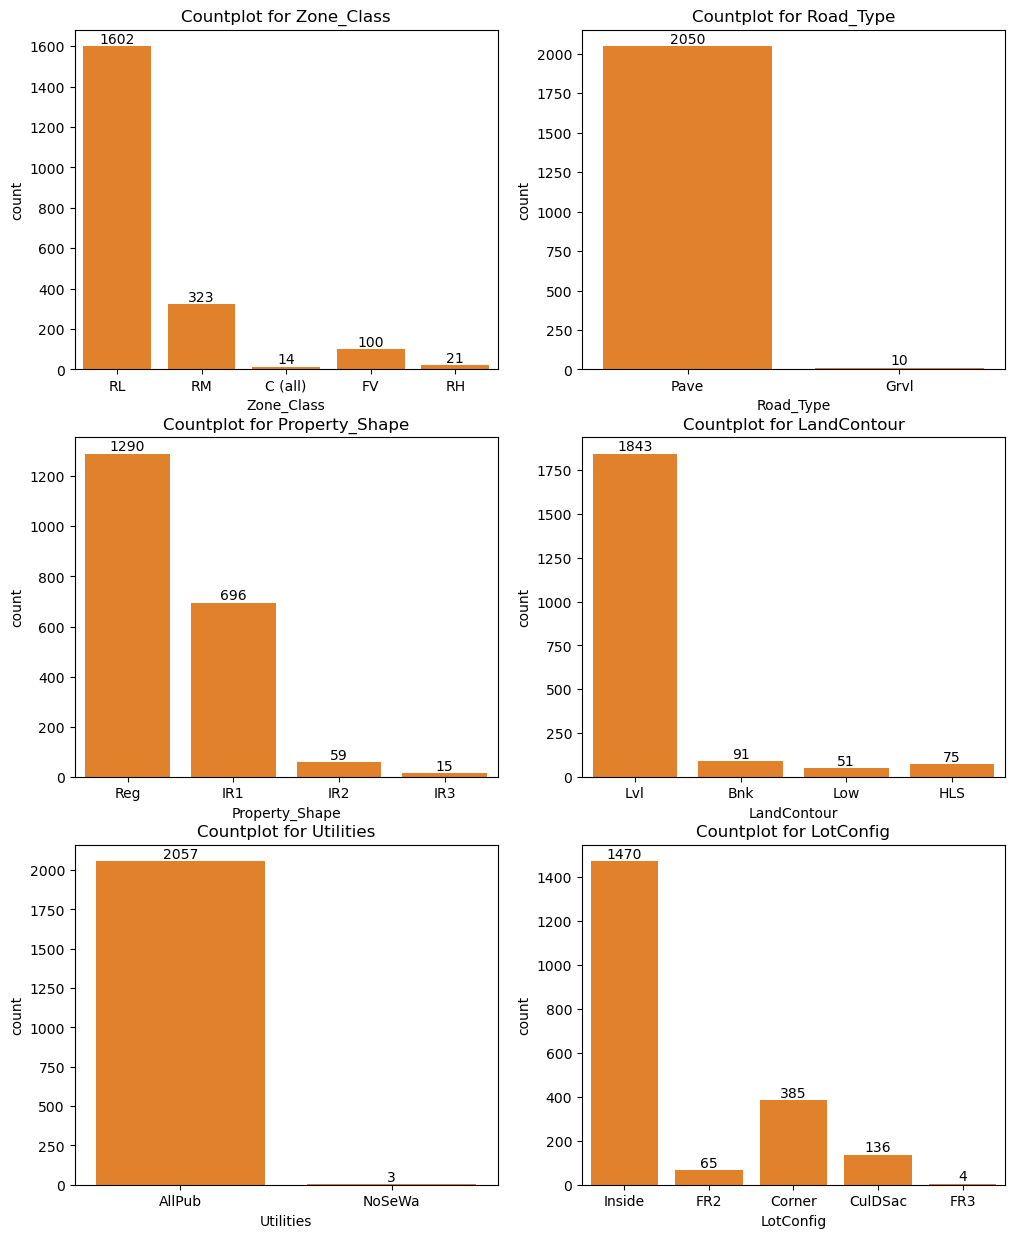

In [32]:
cols = ['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig']
plt.figure(figsize = (12,15))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cols[i]])
    ax = sns.countplot(x=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
1) Road type and utilites can be dropped

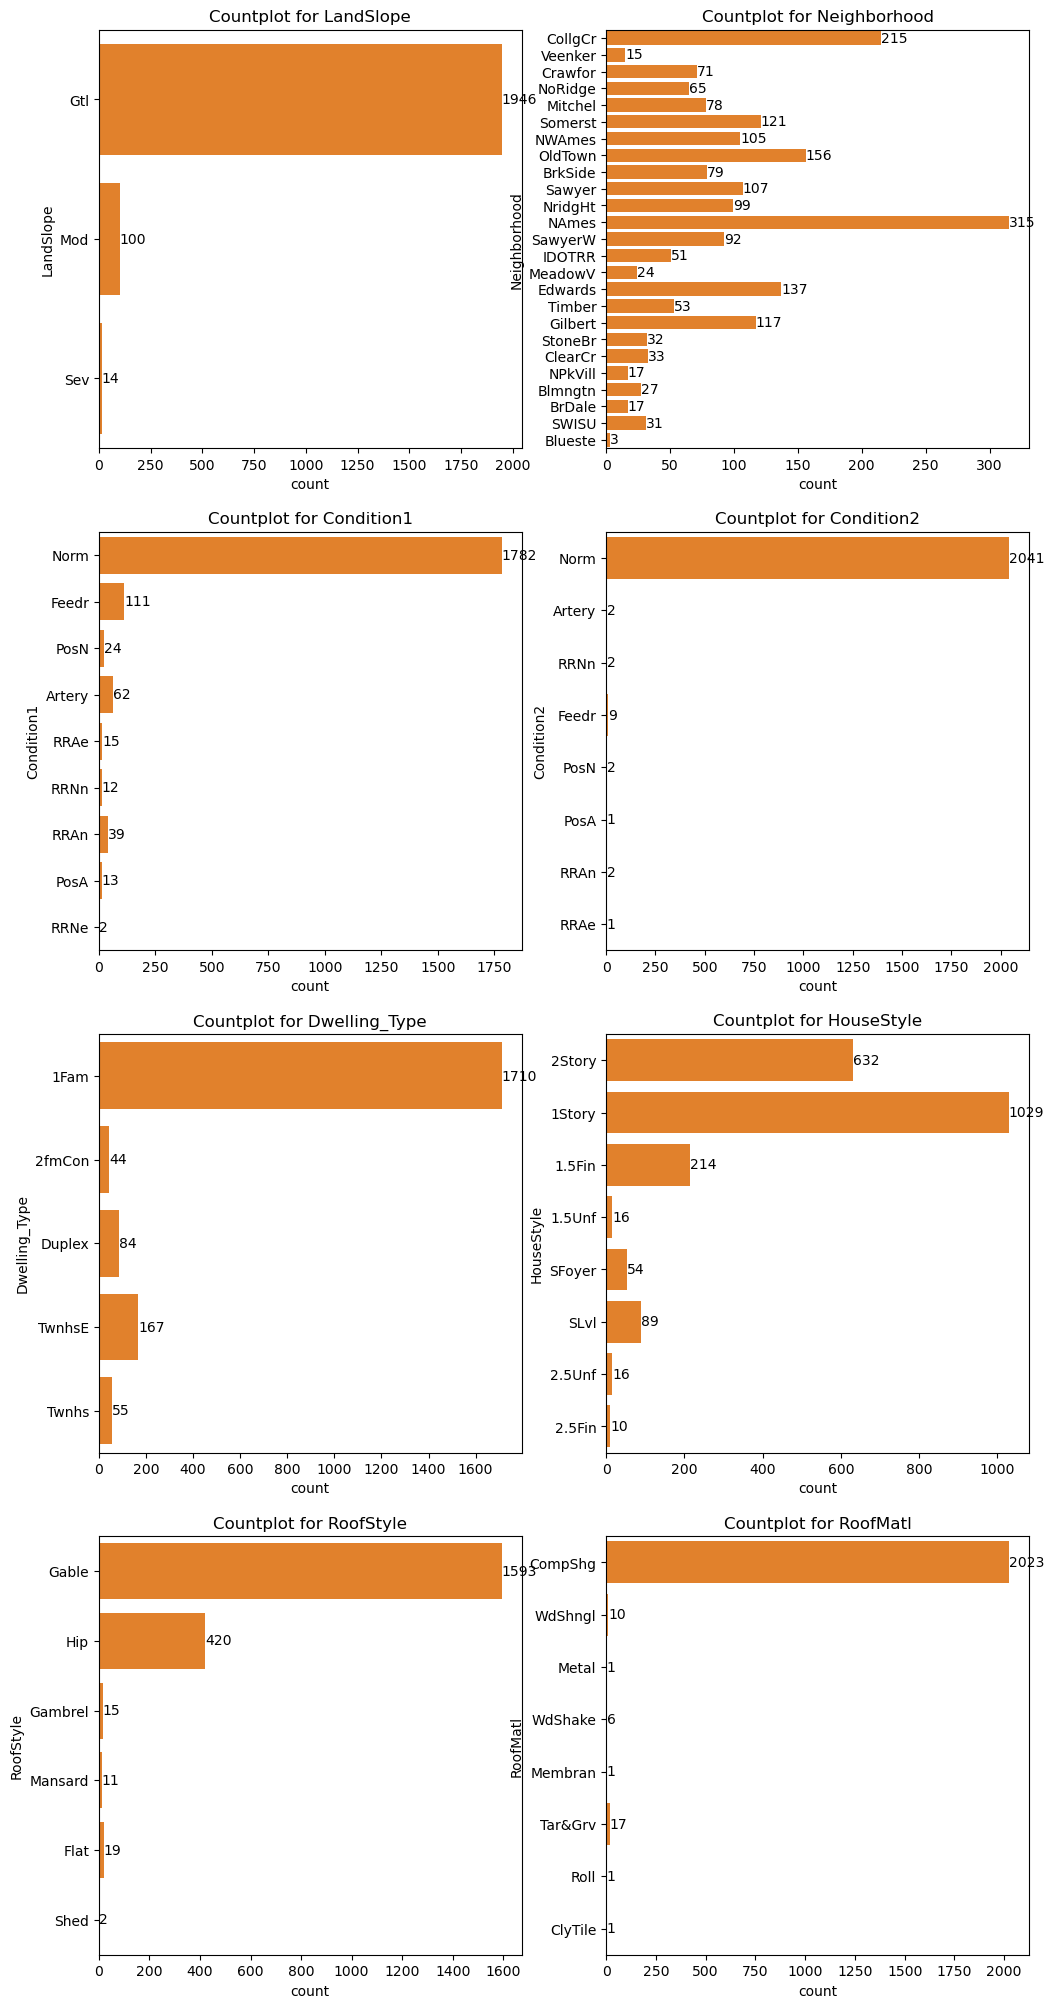

In [33]:
cols = ['LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl']
plt.figure(figsize = (12,25))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(4,2,i+1)
    sns.countplot(y=df[cols[i]])
    ax = sns.countplot(y=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
1) Condition2 and RoofMat1 can be dropped

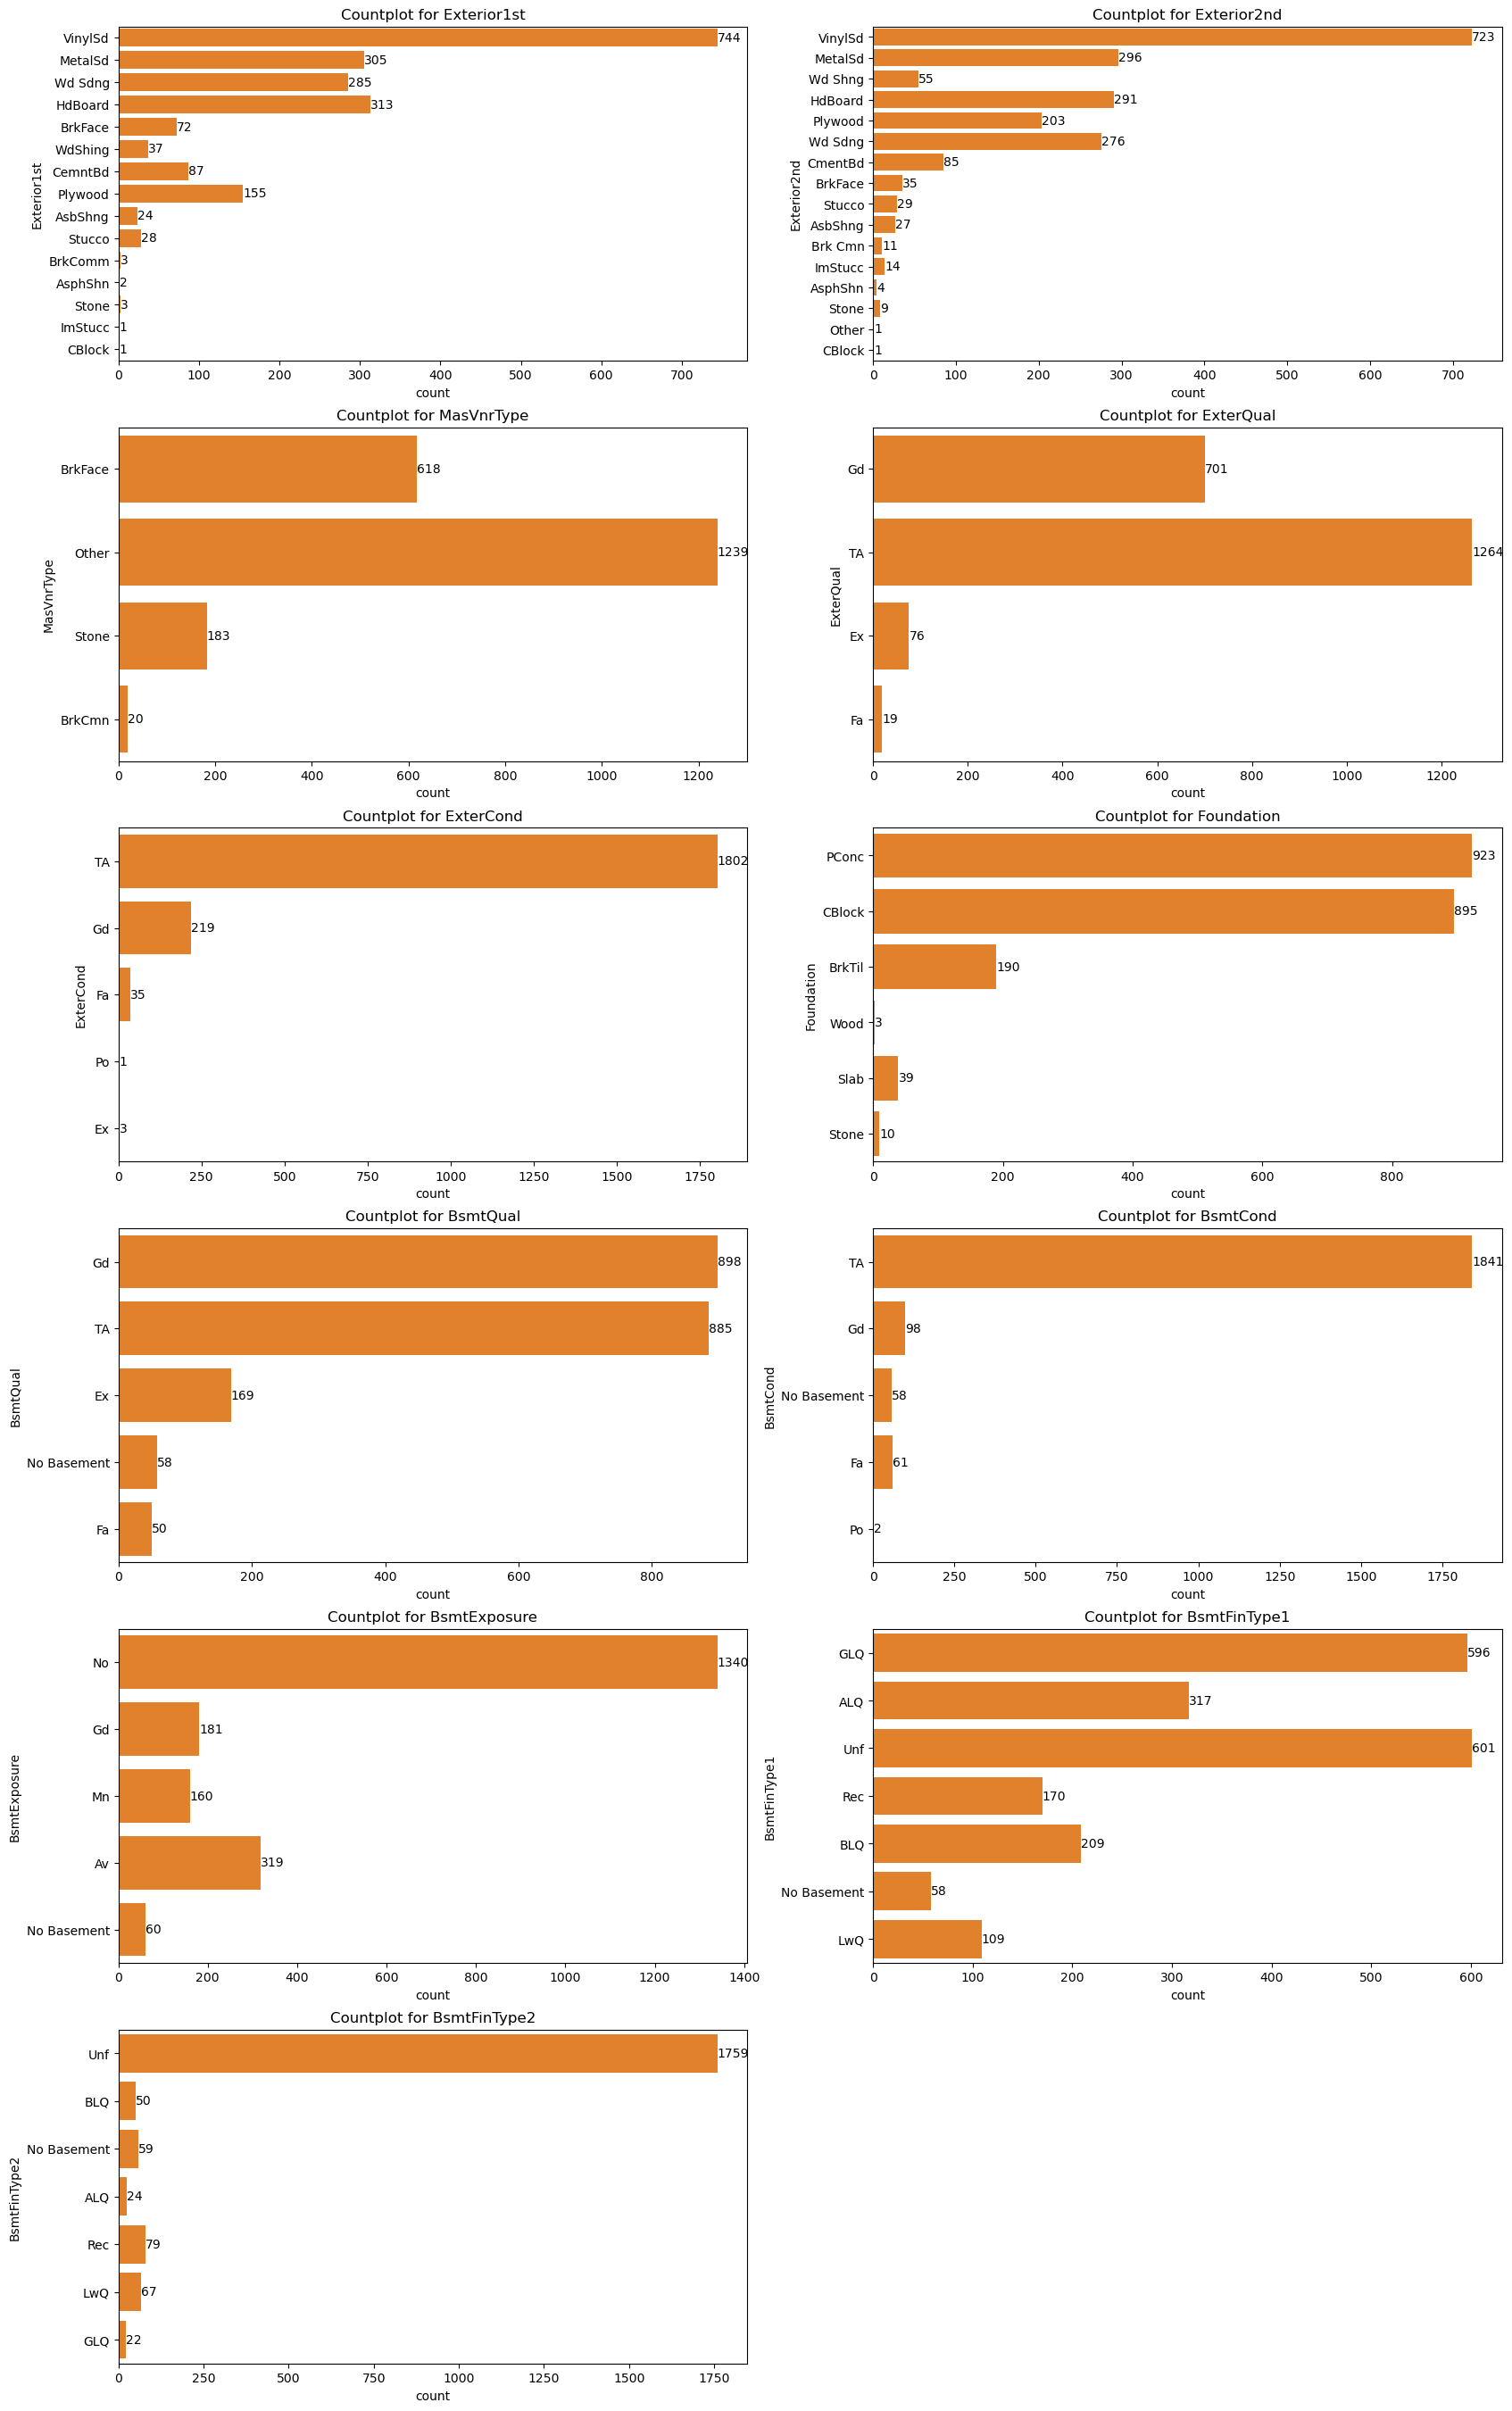

In [34]:
cols = ['Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(6,2,i+1)
    sns.countplot(y=df[cols[i]])
    ax = sns.countplot(y=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
1)exterior1st(as it is nearly same as ext2) can be dropped

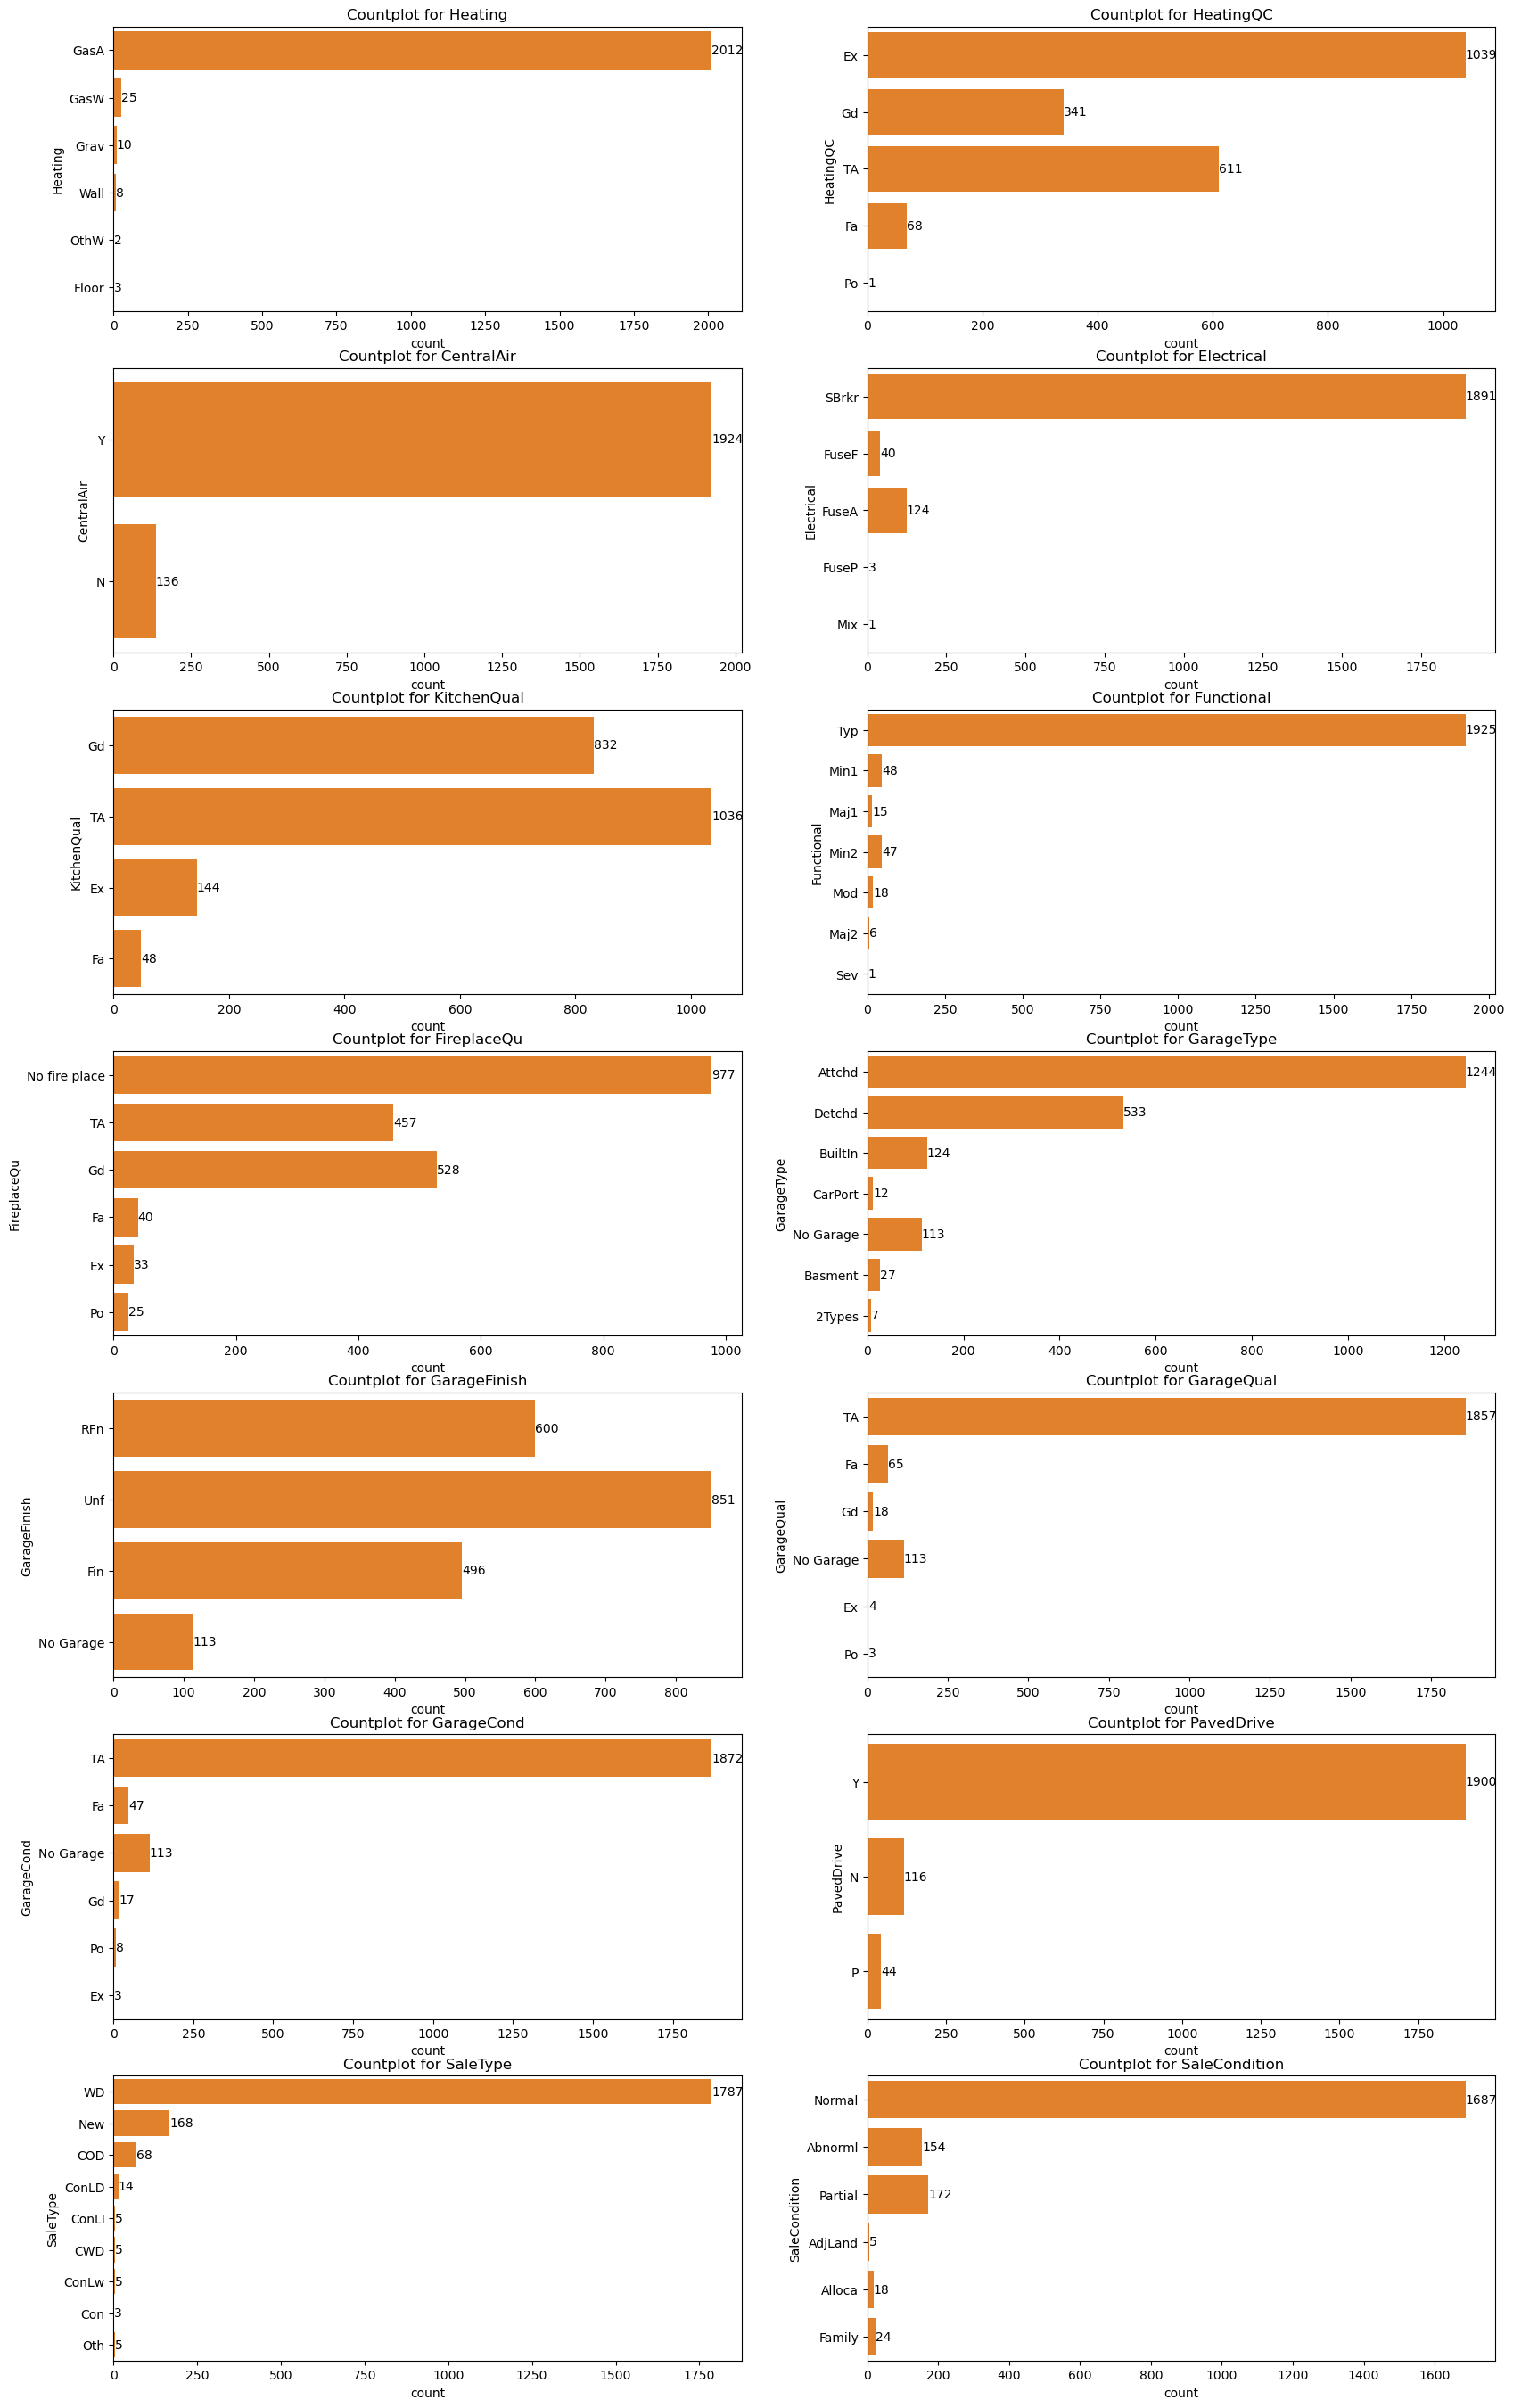

In [35]:
cols = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(7,2,i+1)
    sns.countplot(y=df[cols[i]])
    ax = sns.countplot(y=df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')
plt.show()

#### Inference
1) Heating can be dropped

In [36]:
df.drop(['Heating','Road_Type','Utilities','Condition2','RoofMatl','Exterior1st'],axis=1,inplace=True)

#### Numerical Features

In [37]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

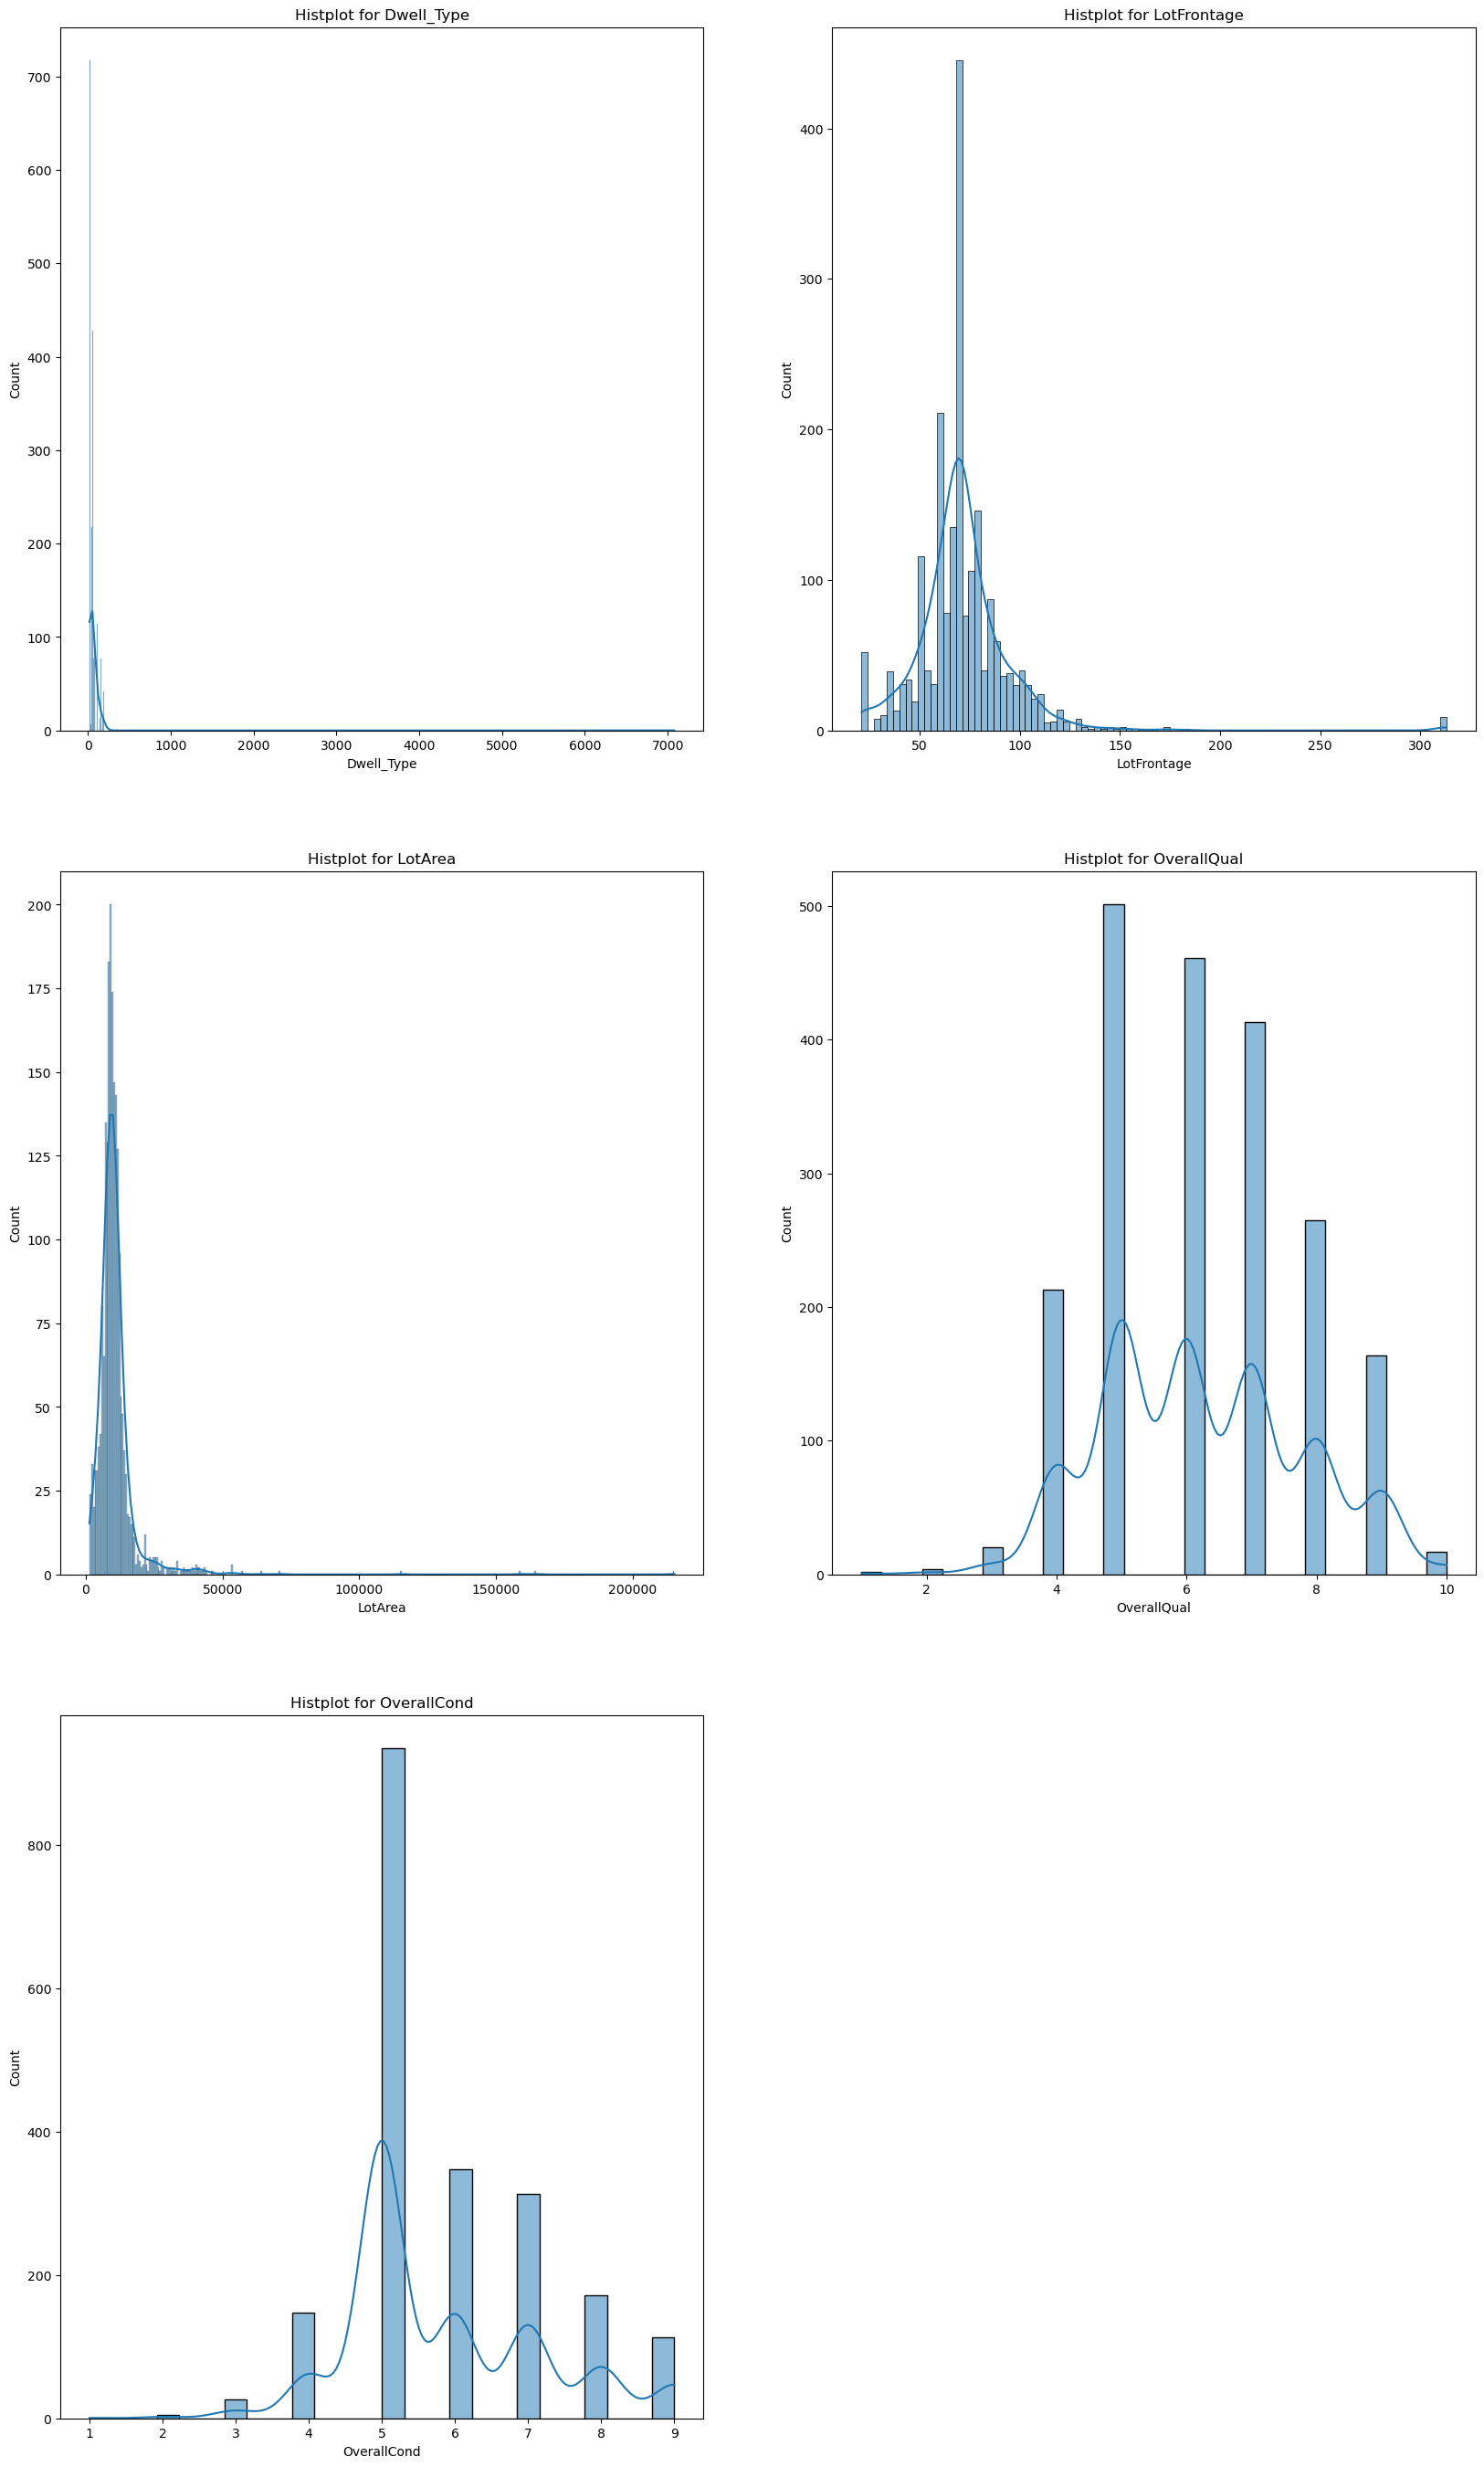

In [38]:
cols = [ 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    sns.histplot(x=df[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')
plt.show()

#### Bi-Variate analysis 

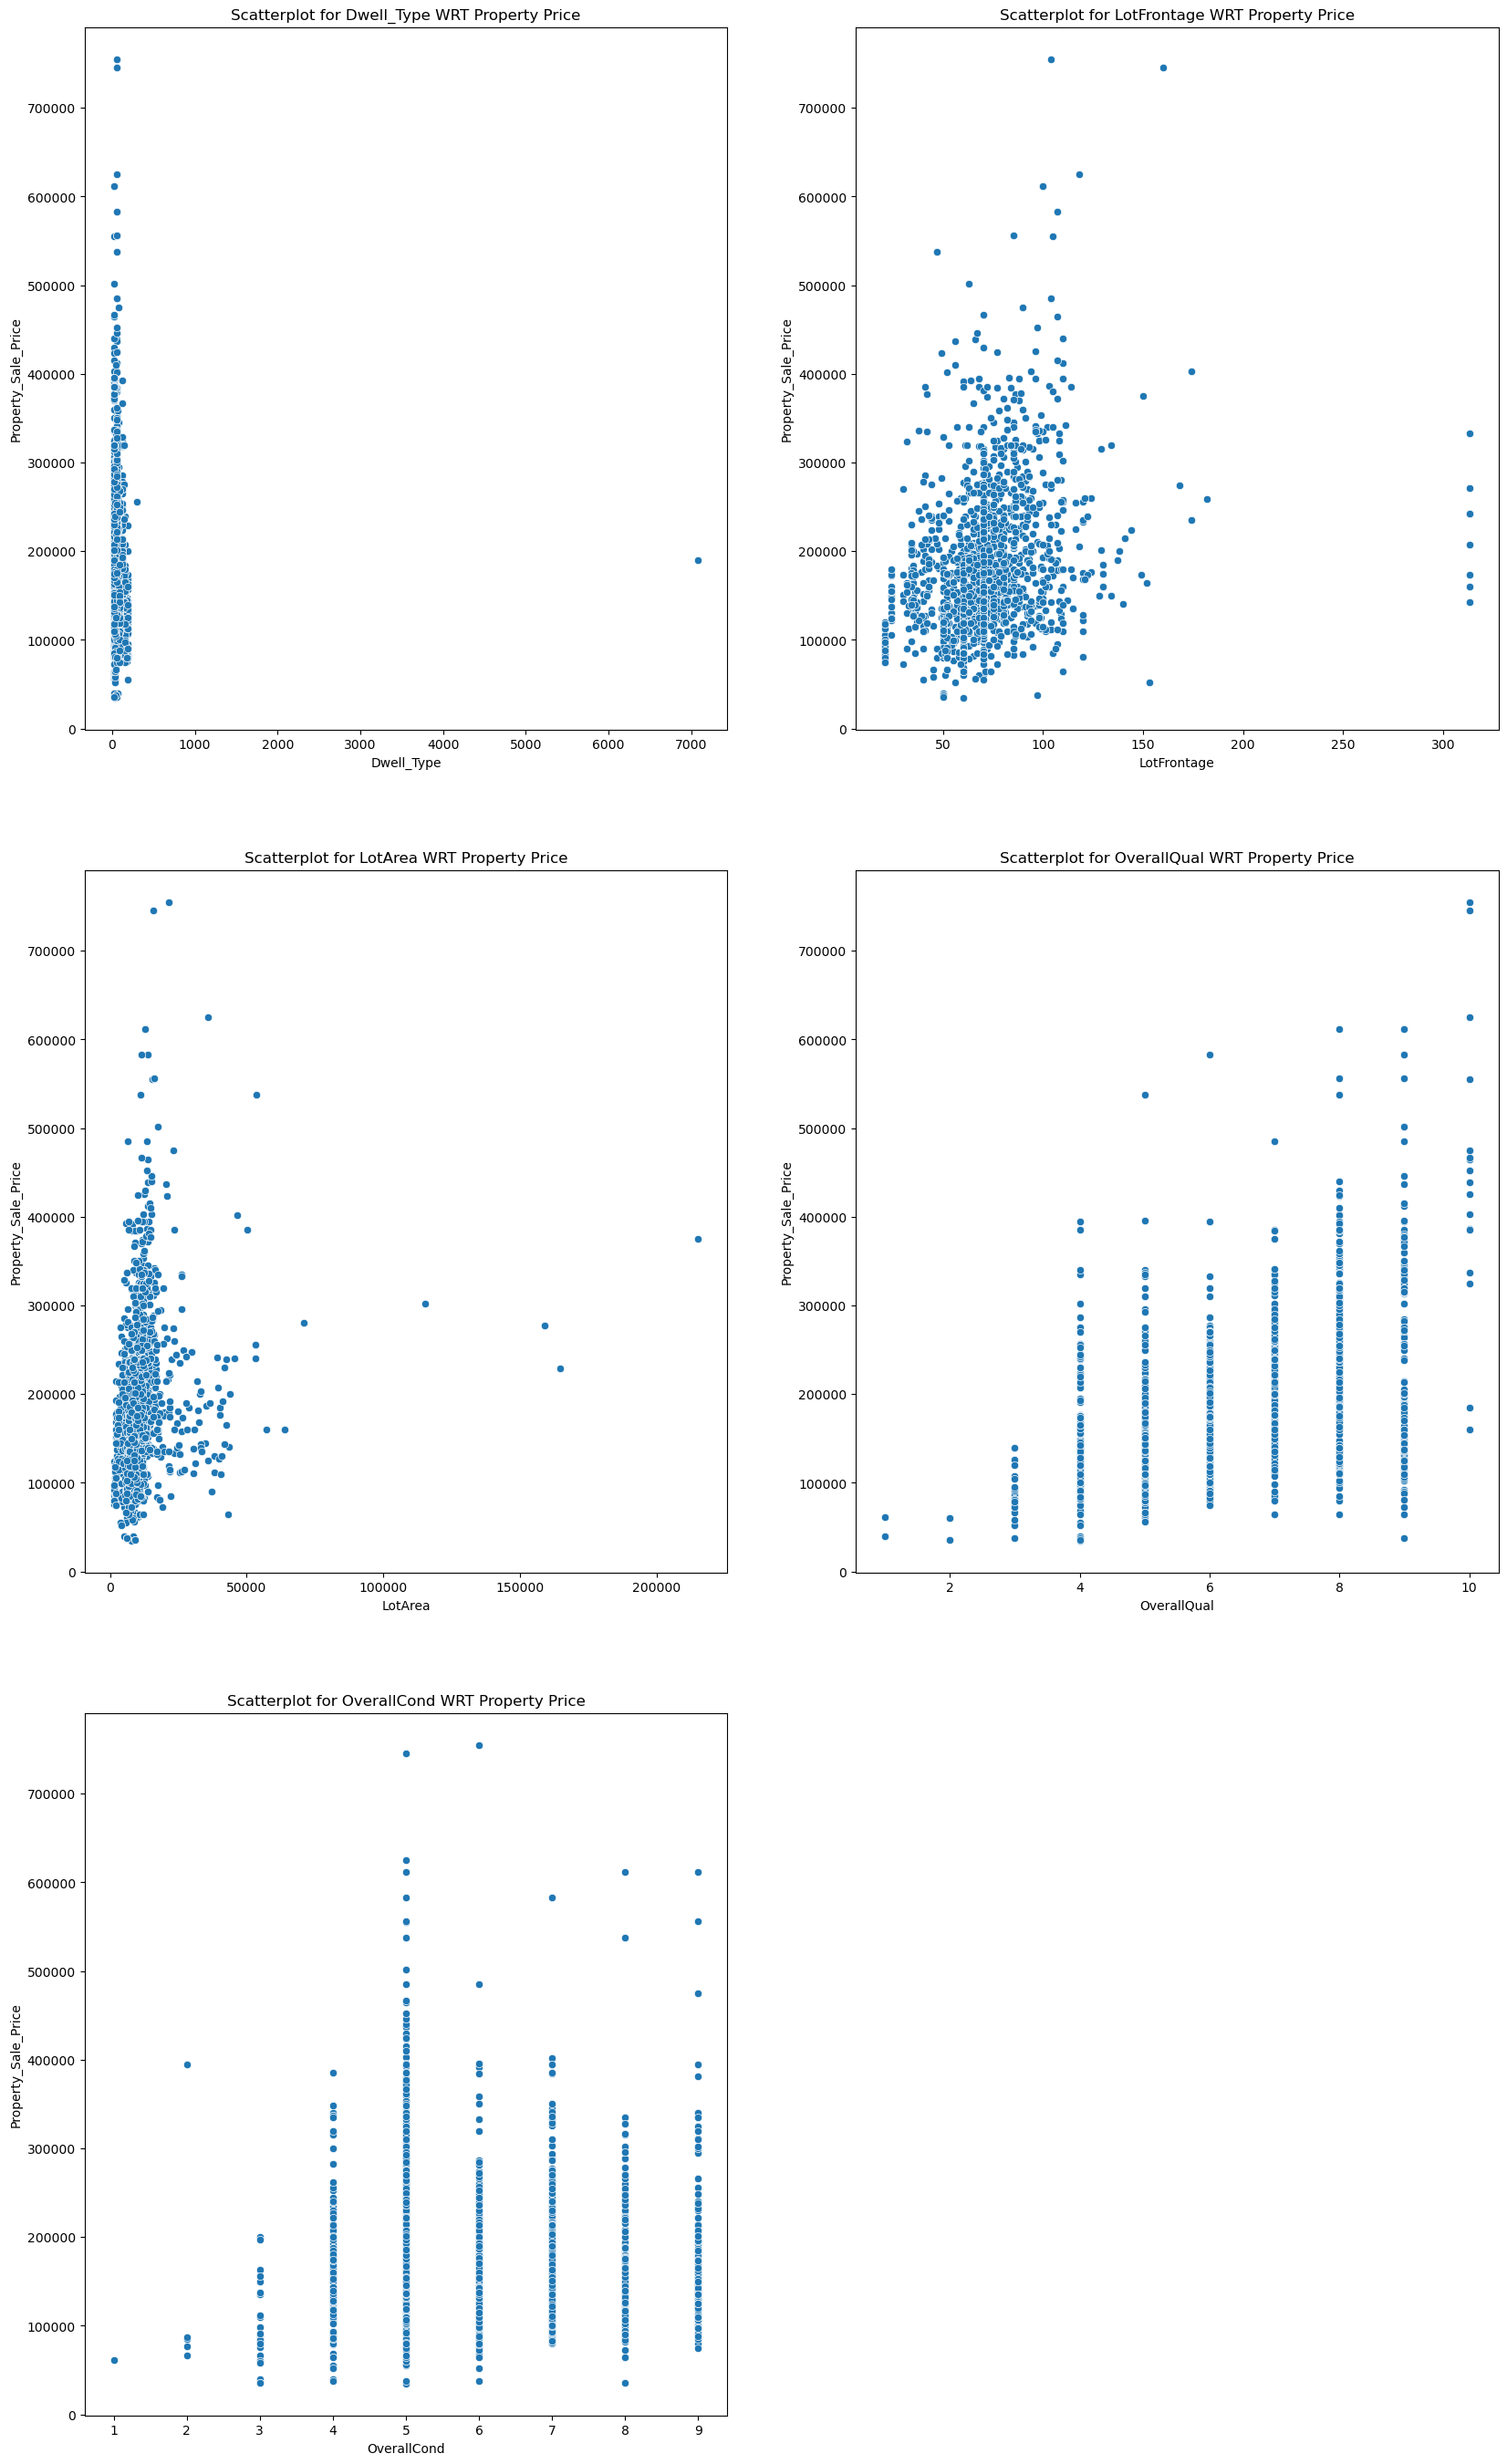

In [39]:
cols = [ 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[cols[i]],y = df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} WRT Property Price')
plt.show()

#### Inference
1) Dwell_Type can be dropped

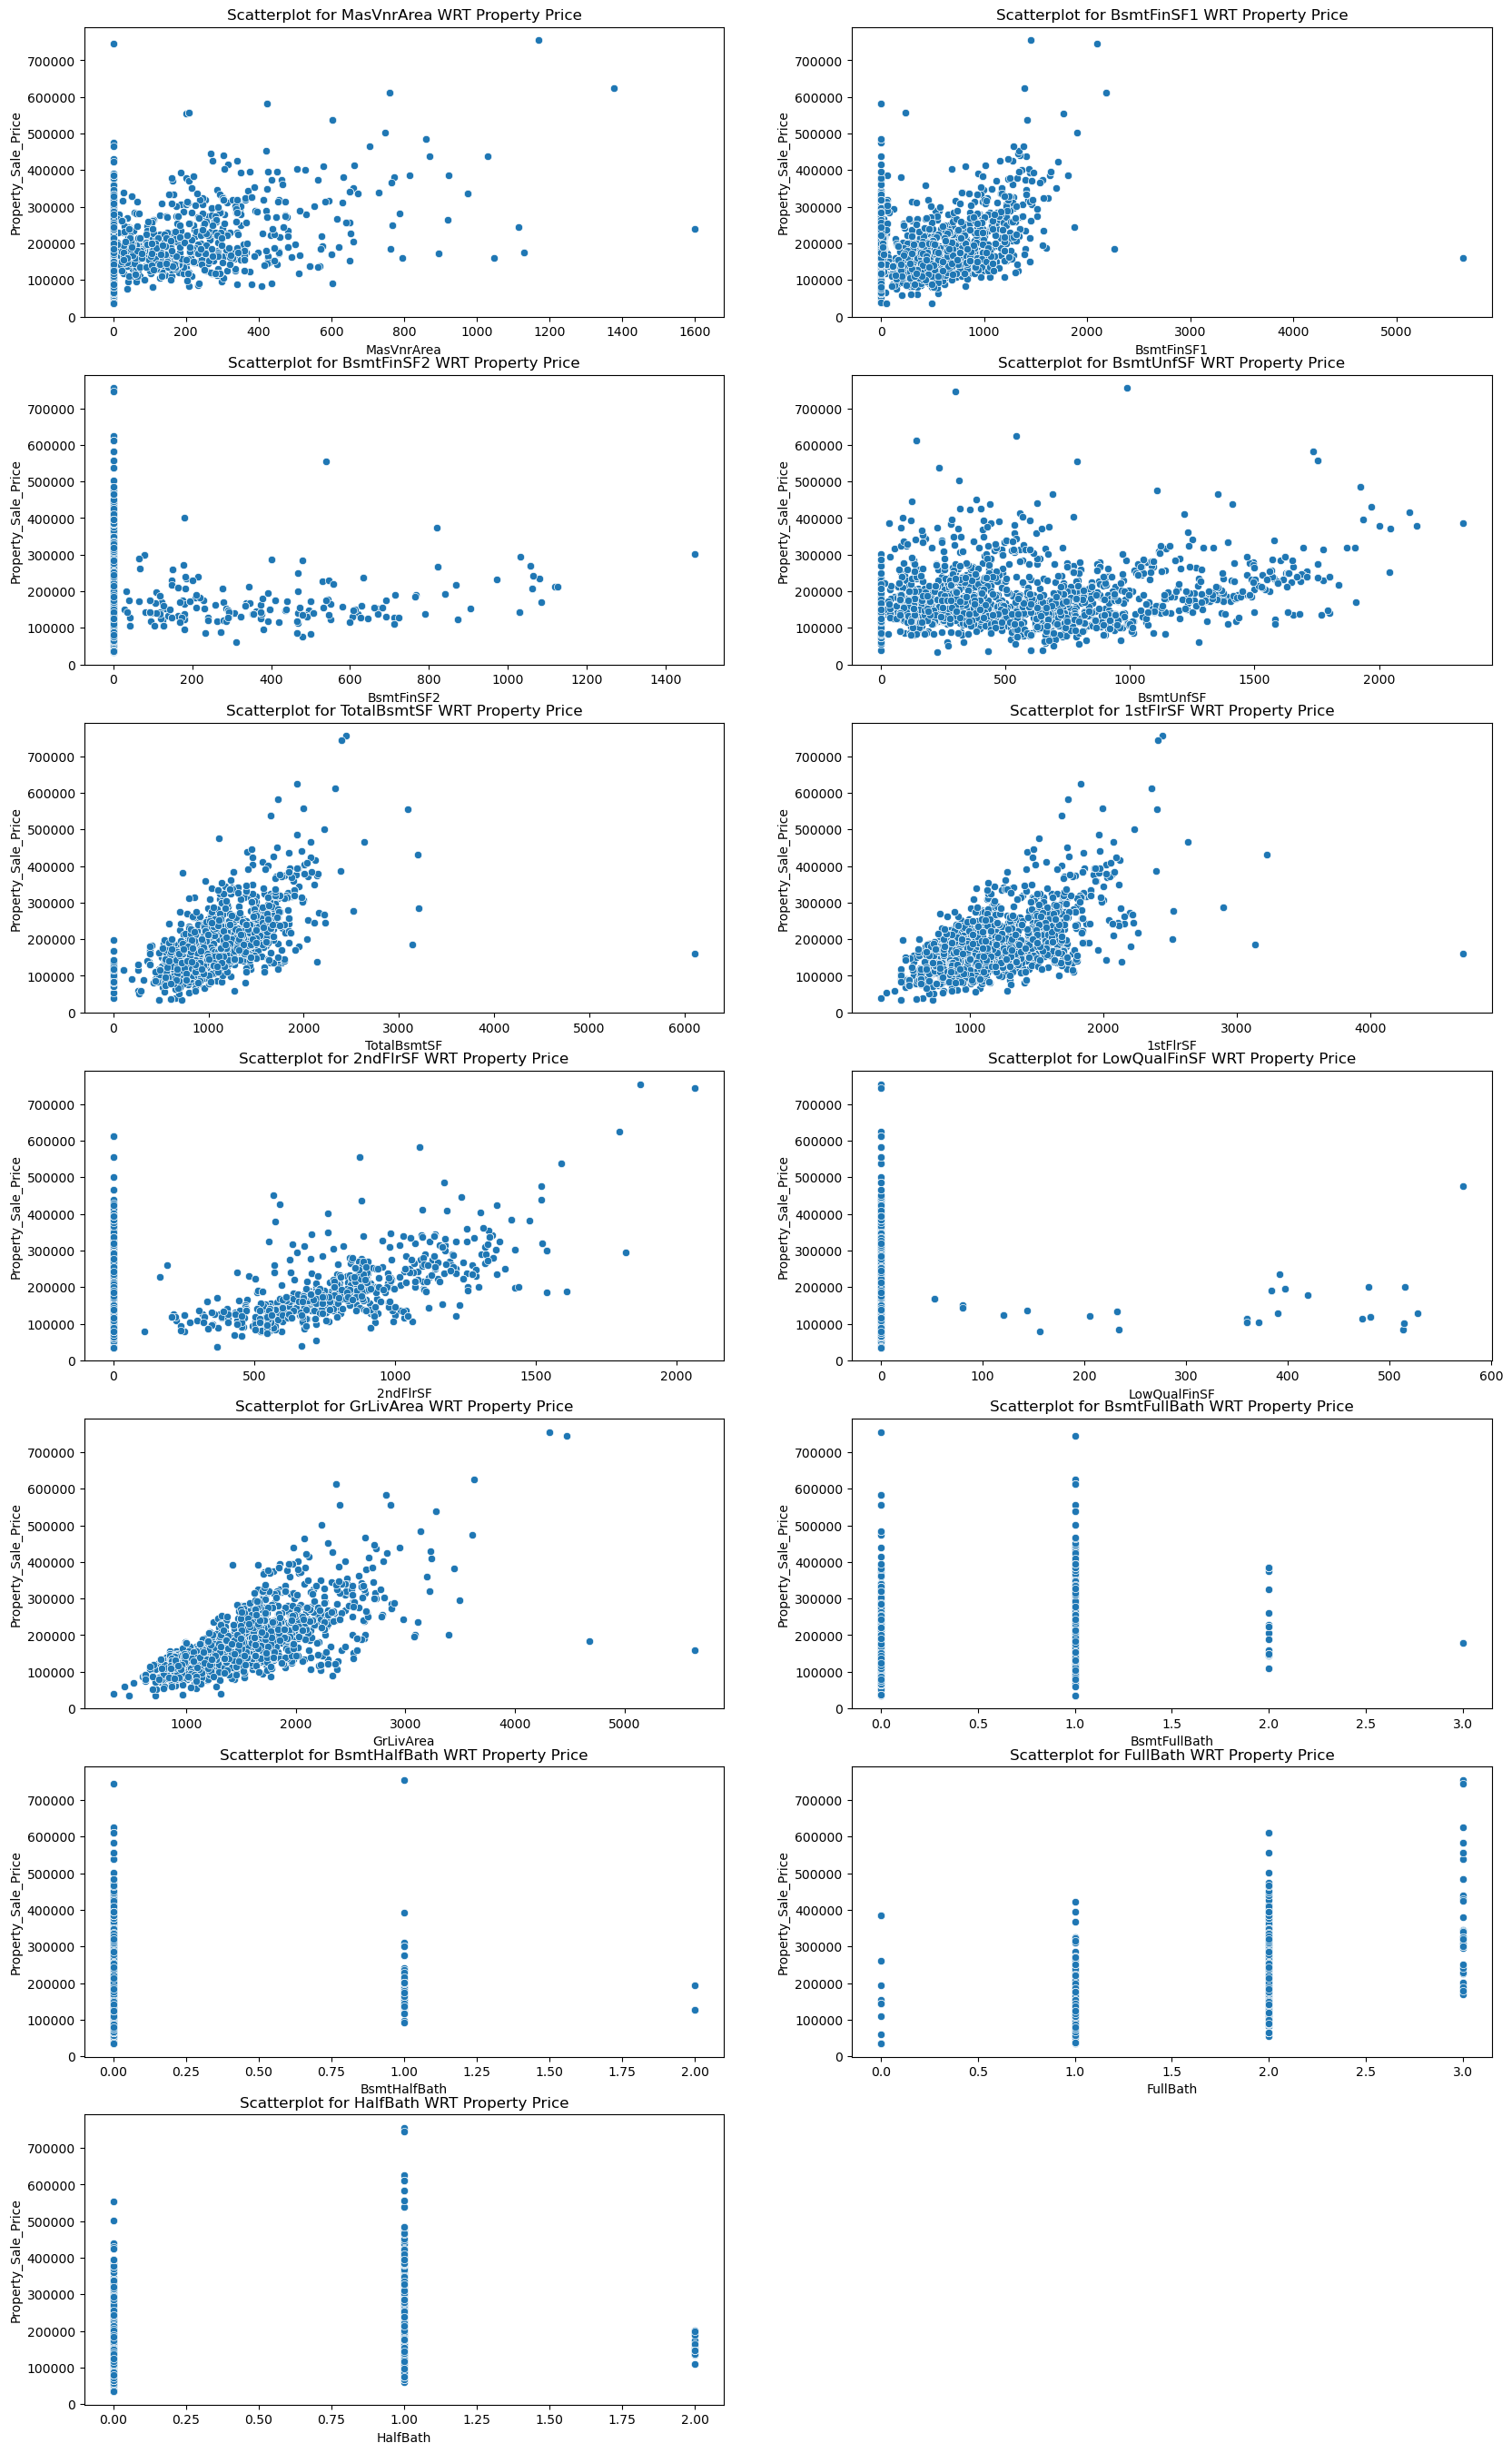

In [40]:
cols = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(7,2,i+1)
    sns.scatterplot(x=df[cols[i]],y = df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} WRT Property Price')
plt.show()

#### Inference
1) LowQualFinSF can be dropped

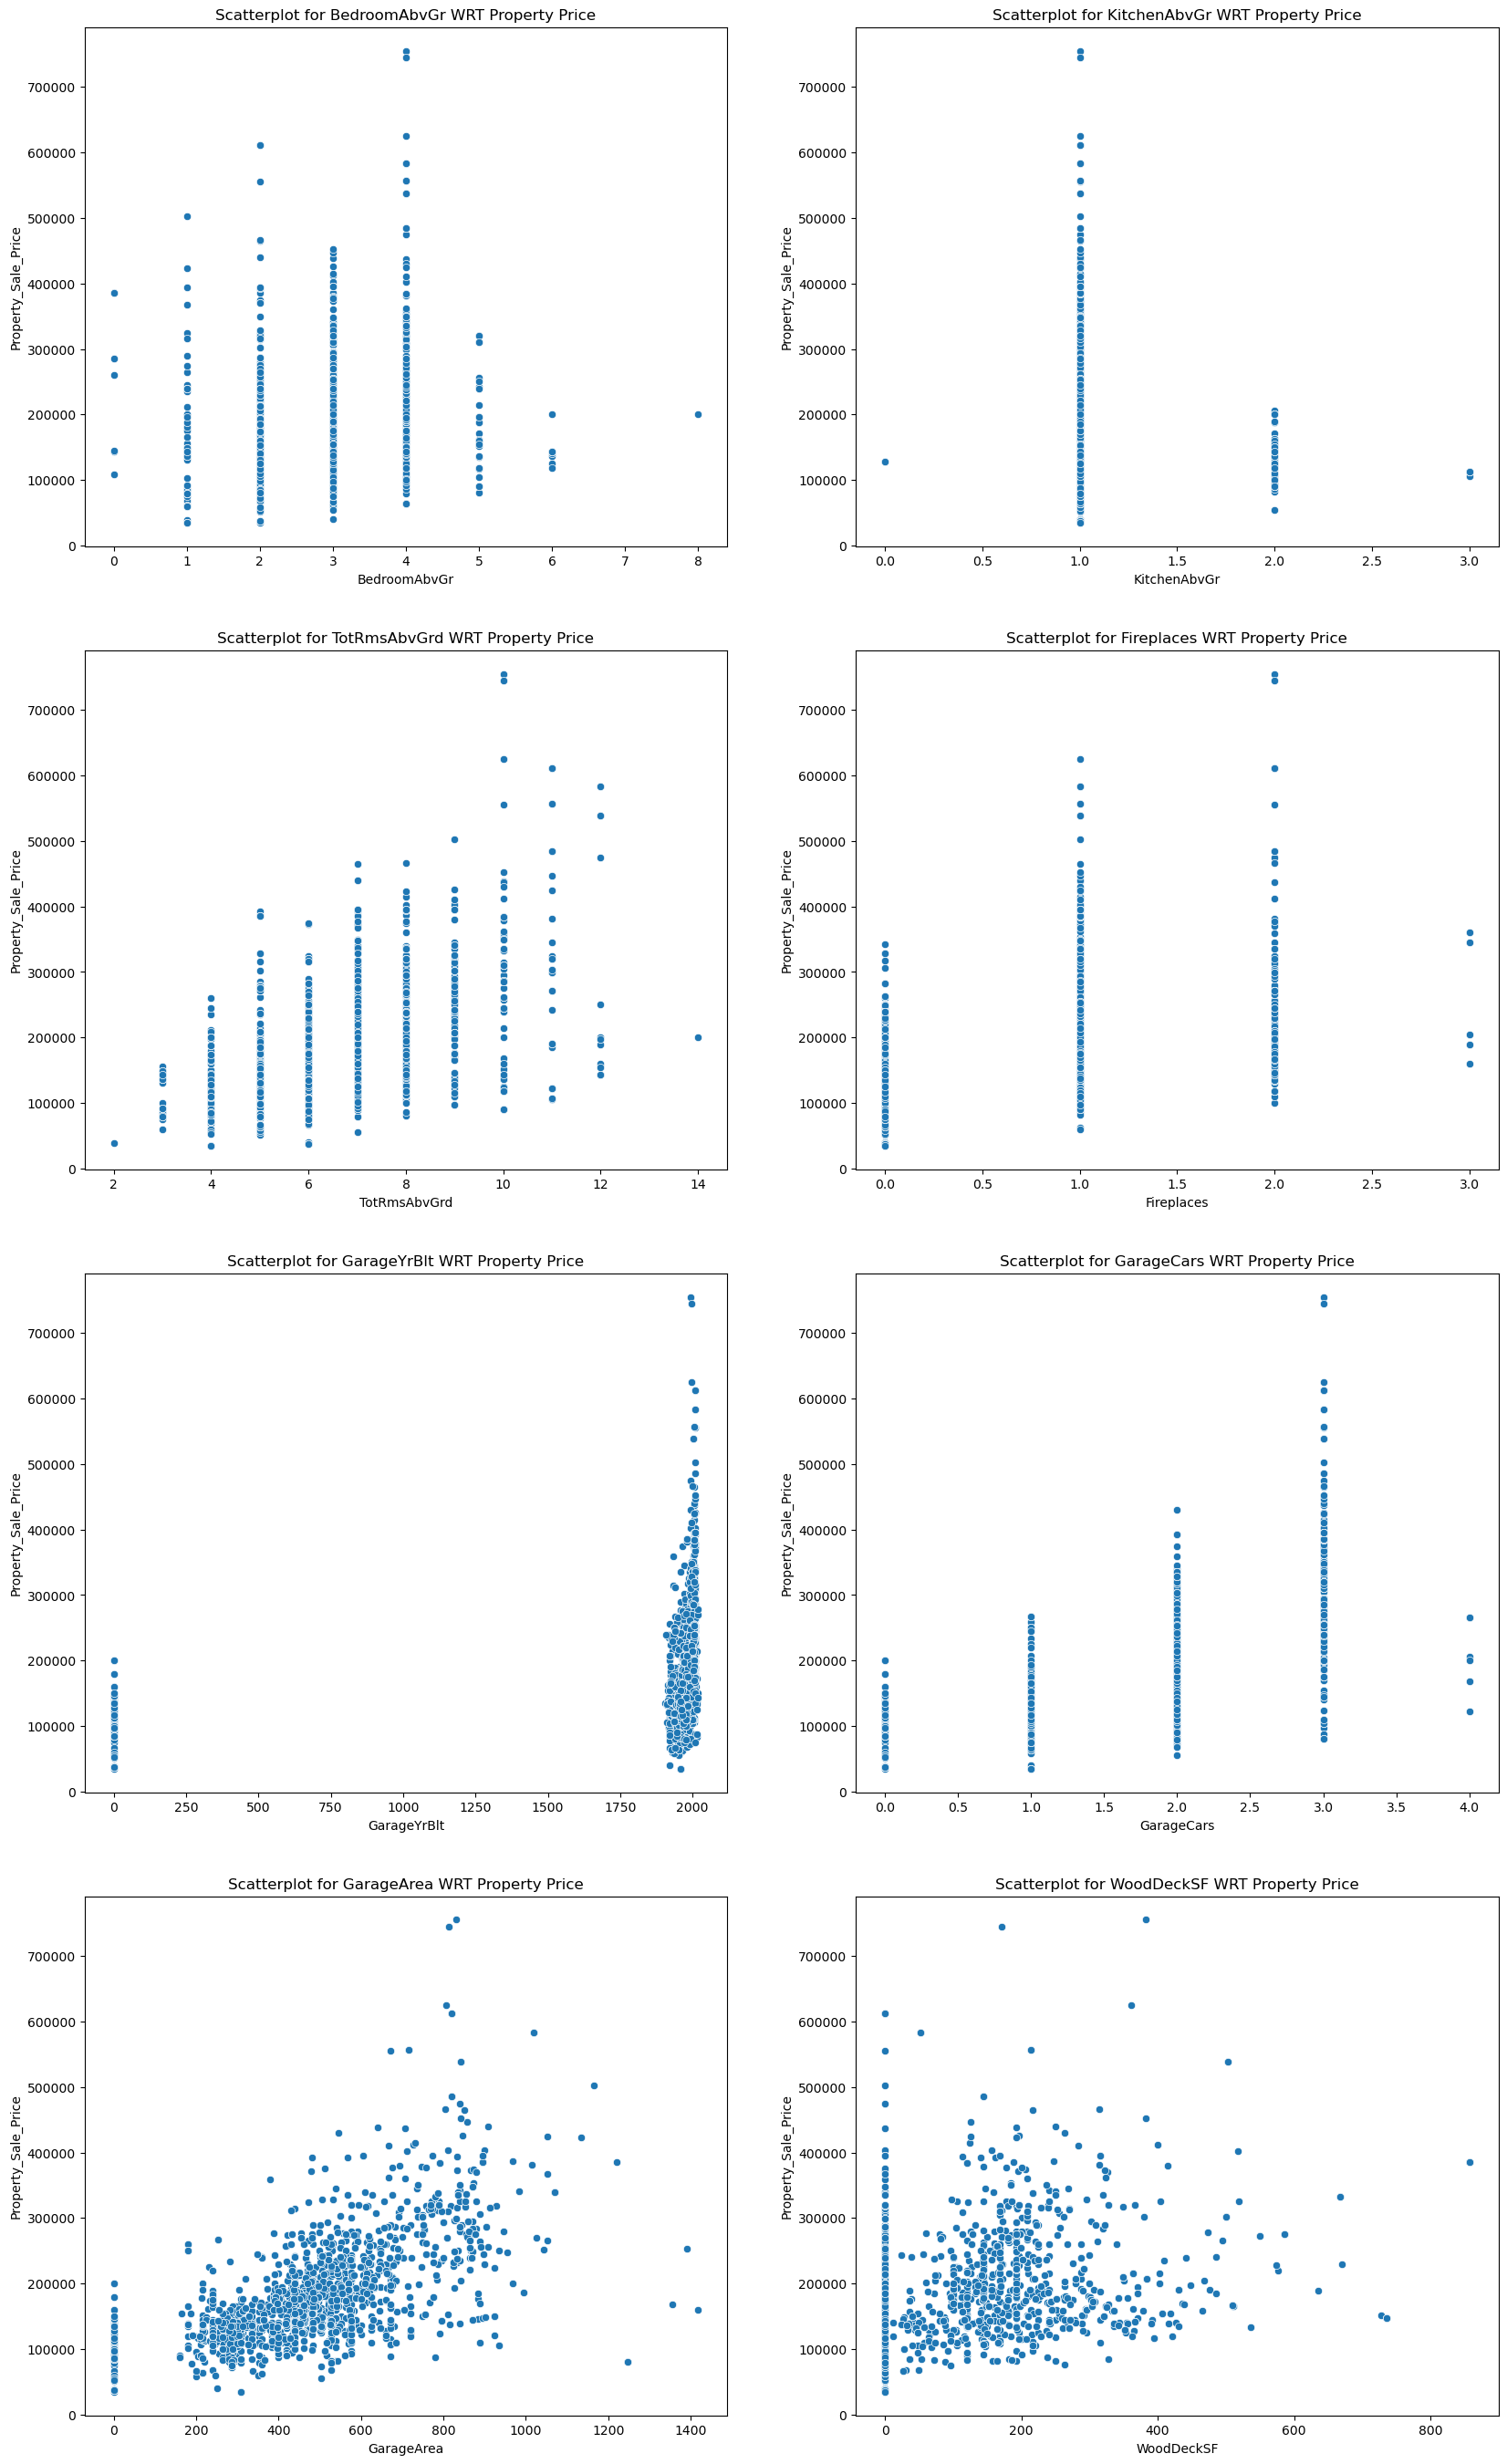

In [41]:
cols = ['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=df[cols[i]],y = df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} WRT Property Price')
plt.show()

In [42]:
df['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1955
2      98
3       5
0       2
Name: count, dtype: int64

#### Inference
1) KitchenAbvGr can be dropped

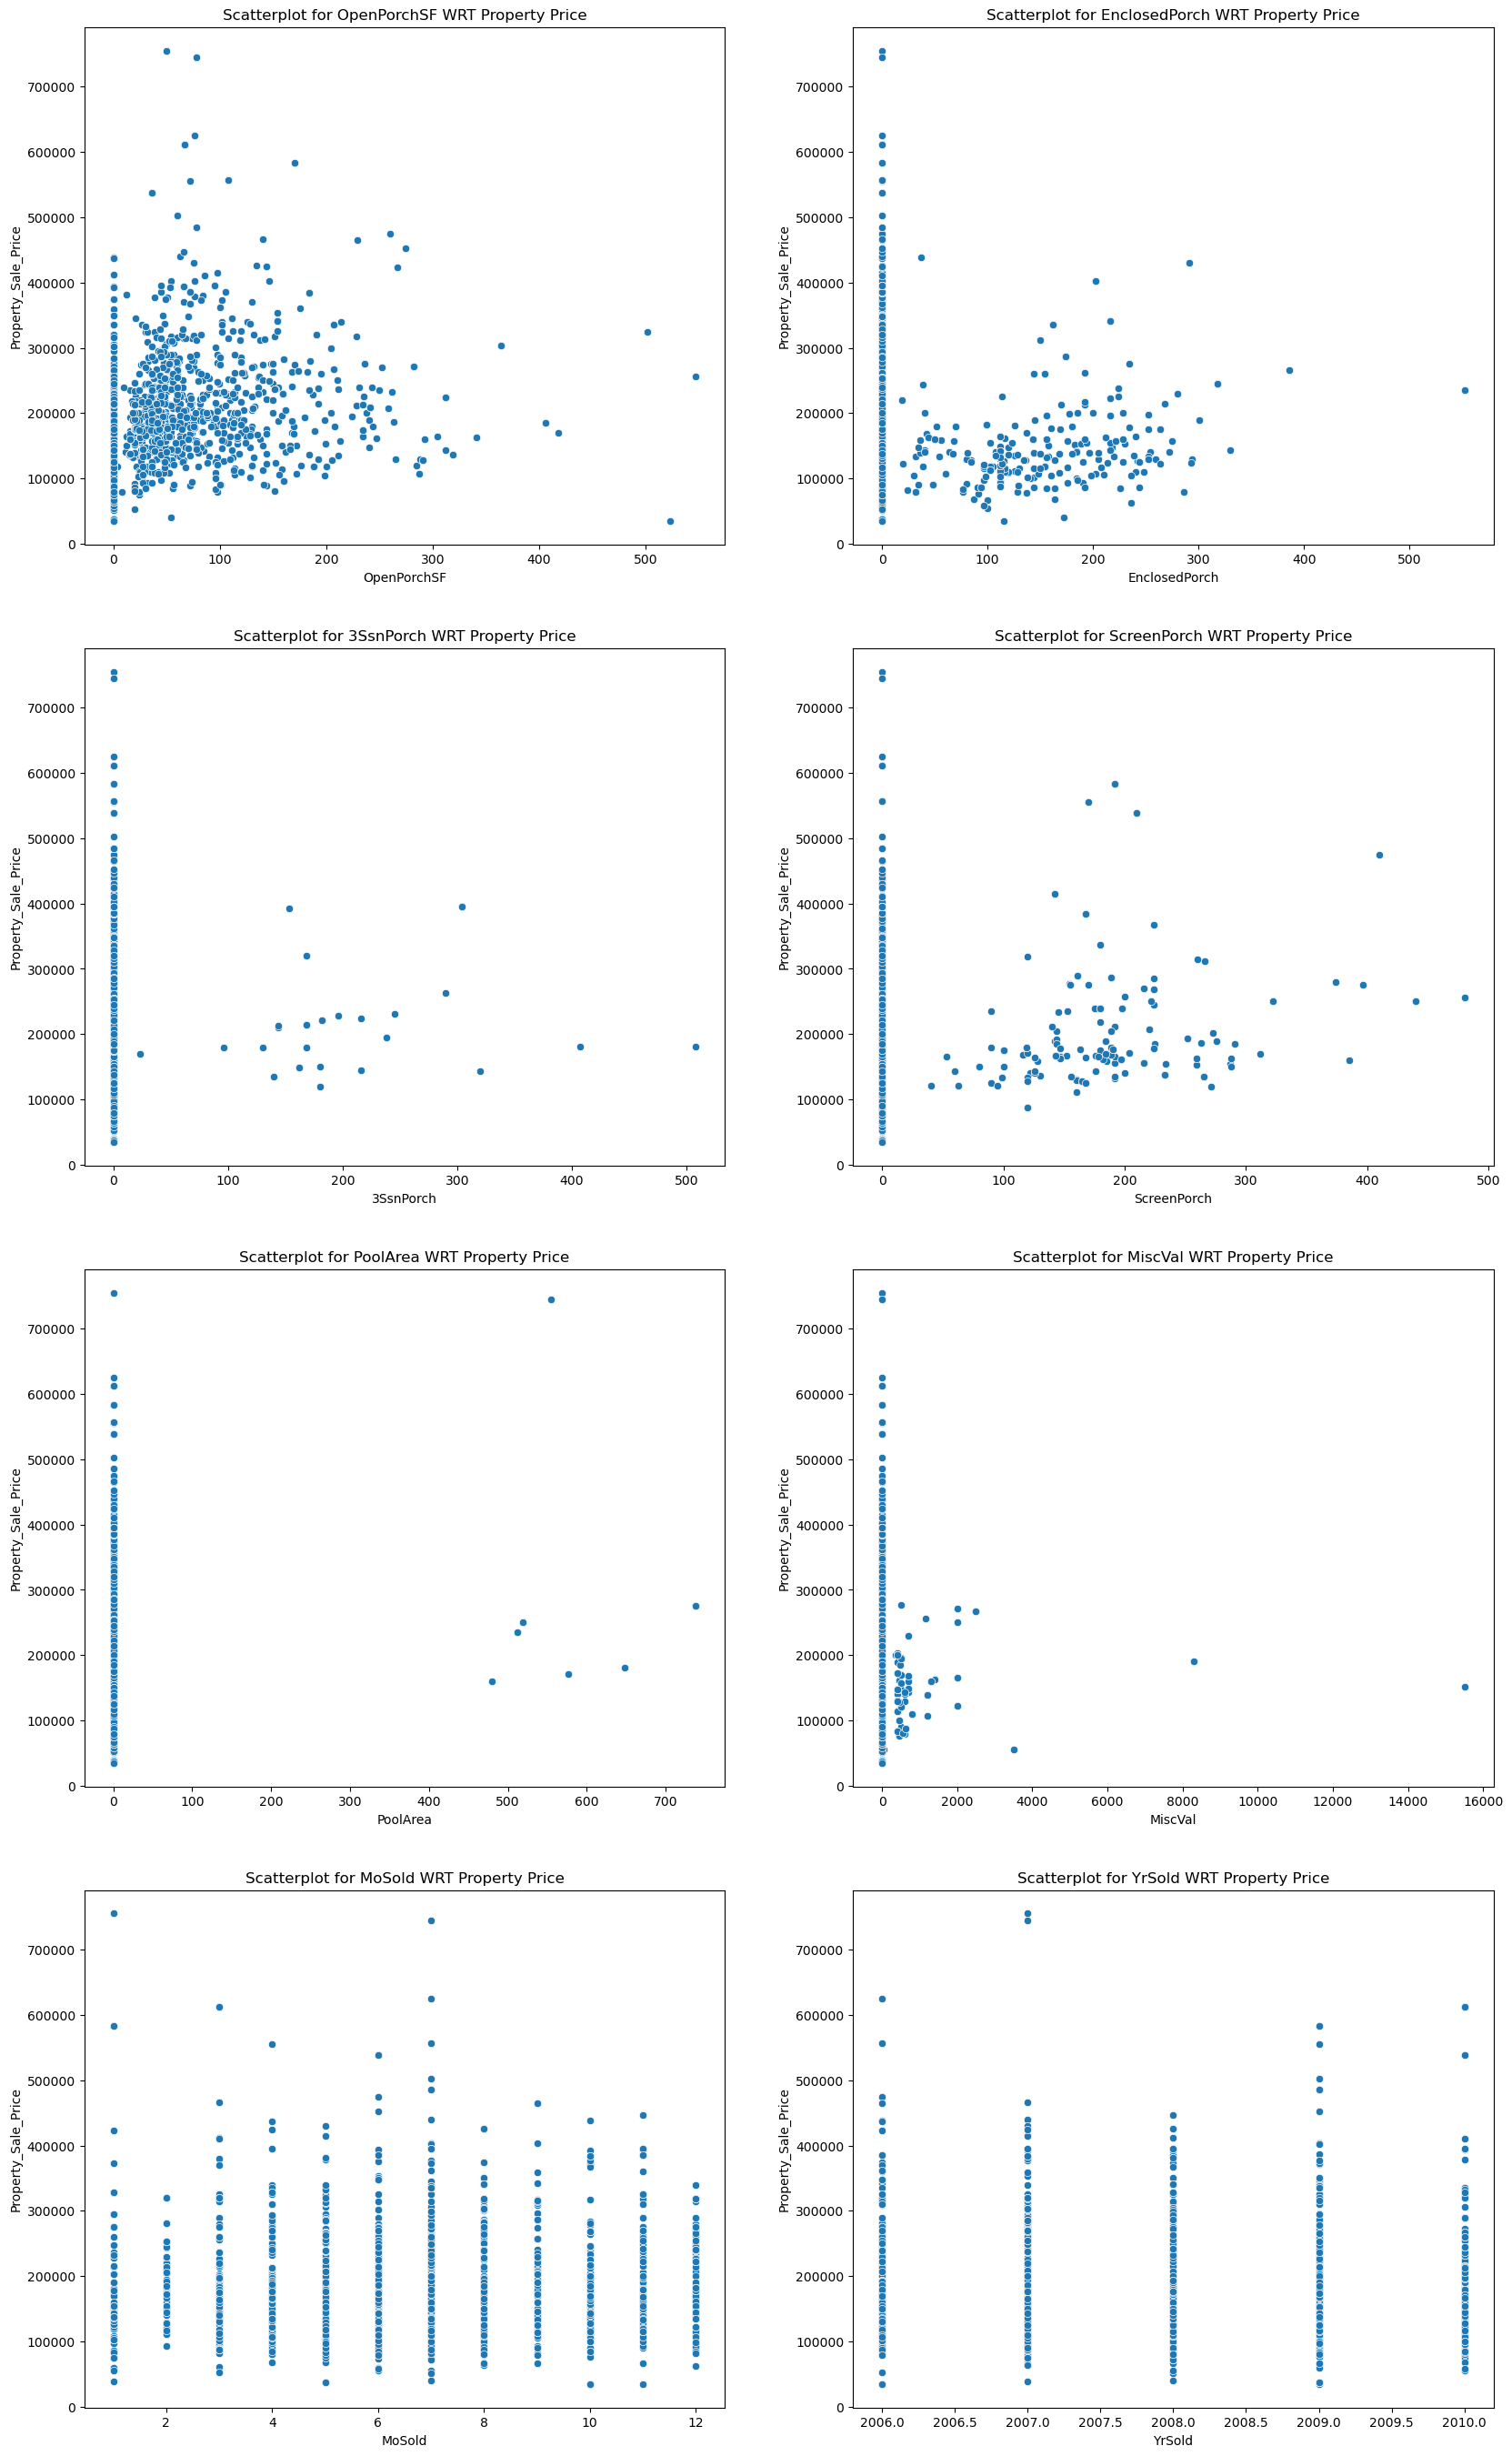

In [43]:
cols = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=df[cols[i]],y = df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} WRT Property Price')
plt.show()

#### Inference
1) PoolArea, 3SsnPorch MisValue can be dropped

In [44]:
print(df[df['MiscVal']==0].shape)
print(df.shape)

(1984, 71)
(2060, 71)


In [45]:
df.drop(['Dwell_Type','LowQualFinSF','PoolArea','3SsnPorch'],axis=1,inplace=True)

In [46]:
df.drop(['KitchenAbvGr'],axis=1,inplace=True)

In [47]:
df.drop(['MiscVal'],axis=1,inplace=True)

In [48]:
df.shape

(2060, 65)

In [49]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
yr_month_cols = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']

for i in yr_month_cols:
    print(i,df[i].nunique())

YearBuilt 117
YearRemodAdd 72
GarageYrBlt 103
MoSold 12
YrSold 5


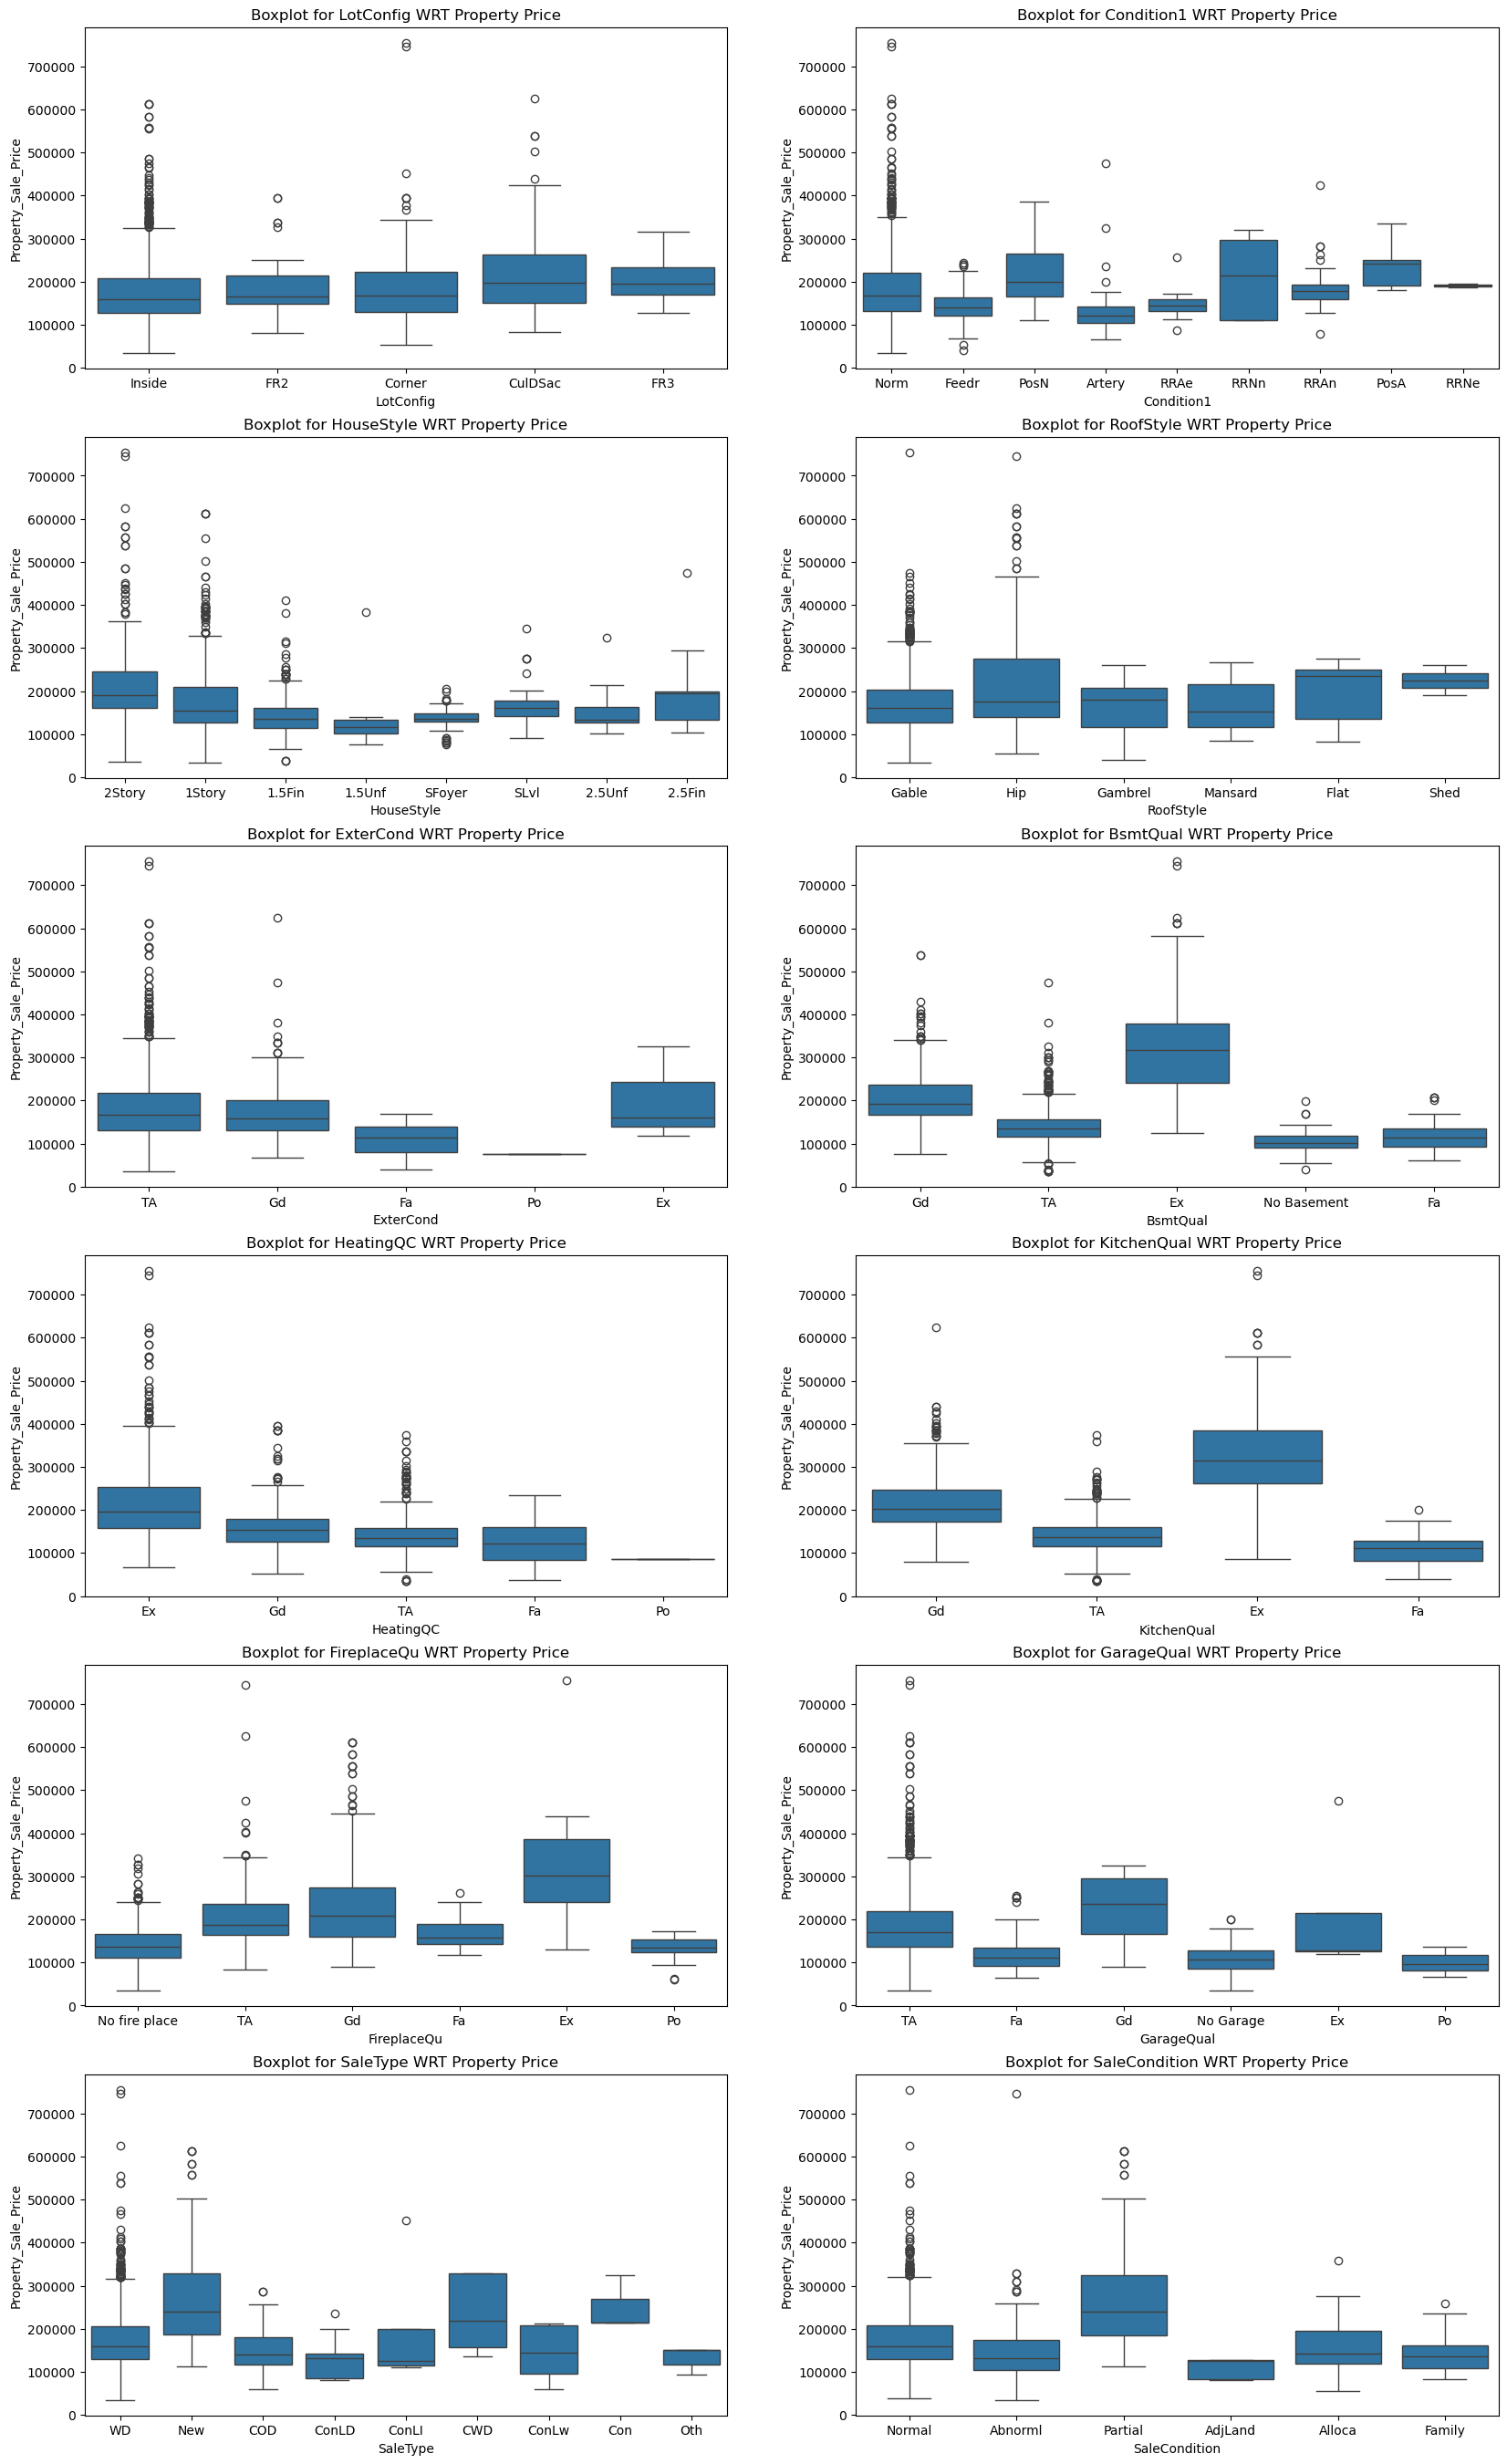

In [51]:
cols = ['LotConfig','Condition1','HouseStyle','RoofStyle','ExterCond','BsmtQual','HeatingQC','KitchenQual',"FireplaceQu",
        'GarageQual','SaleType','SaleCondition']
plt.figure(figsize = (20,34))
for i in range(len(cols)): # i = 0,1,2,3,4,5
    plt.subplot(6,2,i+1)
    sns.boxplot(x=df[cols[i]],y = df['Property_Sale_Price'])
    plt.title(f'Boxplot for {cols[i]} WRT Property Price')
plt.show()

In [52]:
cat_cols

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
yr_month_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']

#### Feature Engeineering

In [54]:
df['House_Age'] = 2024 - df['YearBuilt']
df['Age_Since_Sold'] = 2024 - df['YrSold']


In [55]:
num_cols = df.dtypes[df.dtypes != 'object'].index
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold', 'Property_Sale_Price', 'House_Age', 'Age_Since_Sold'],
      dtype='object')

#### Feature Selection
1) Graph Selection
2) T test, Z test(whene there re only 2 categories then T test and Z test), ANOVA
3) VIF
4) OLS
5) Feature Selection Methods

In [56]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())

Zone_Class
Zone_Class
RL         1602
RM          323
FV          100
RH           21
C (all)      14
Name: count, dtype: int64
Property_Shape
Property_Shape
Reg    1290
IR1     696
IR2      59
IR3      15
Name: count, dtype: int64
LandContour
LandContour
Lvl    1843
Bnk      91
HLS      75
Low      51
Name: count, dtype: int64
LotConfig
LotConfig
Inside     1470
Corner      385
CulDSac     136
FR2          65
FR3           4
Name: count, dtype: int64
LandSlope
LandSlope
Gtl    1946
Mod     100
Sev      14
Name: count, dtype: int64
Neighborhood
Neighborhood
NAmes      315
CollgCr    215
OldTown    156
Edwards    137
Somerst    121
Gilbert    117
Sawyer     107
NWAmes     105
NridgHt     99
SawyerW     92
BrkSide     79
Mitchel     78
Crawfor     71
NoRidge     65
Timber      53
IDOTRR      51
ClearCr     33
StoneBr     32
SWISU       31
Blmngtn     27
MeadowV     24
NPkVill     17
BrDale      17
Veenker     15
Blueste      3
Name: count, dtype: int64
Condition1
Condition1
Norm      178

In [57]:
#### ANOVA - Garage Finish
# Unf          851
# RFn          600
# Fin          496
# No Garage    113


In [58]:
from scipy.stats import f_oneway

In [59]:
# Ho: There is no significant diff between means of different garage Finish
# H1: There is a significant diff between means of diff garage Finish. Atleast one of th mean differs significantly From other

a1 = df['Property_Sale_Price'][df['GarageFinish']=='Unf']
a2 = df['Property_Sale_Price'][df['GarageFinish']=='RFn']
a3 = df['Property_Sale_Price'][df['GarageFinish']=='Fin']
a4 = df['Property_Sale_Price'][df['GarageFinish']=='No Garage']


In [60]:
f_stat, p = f_oneway(a1,a2,a3,a4)
print('Test Stat',f_stat)
print('p',p)
if p > 0.05:
    print('Ho is Accepted: Feature is NOT Significant')
else:
    print('H1 is Accepted: Feature is Significant')

Test Stat 315.3451118583681
p 2.0541344525353805e-168
H1 is Accepted: Feature is Significant


#### Correlation
1) Between Independent Features: corr => high => multicollinearity exist
2) Between target and independent feture

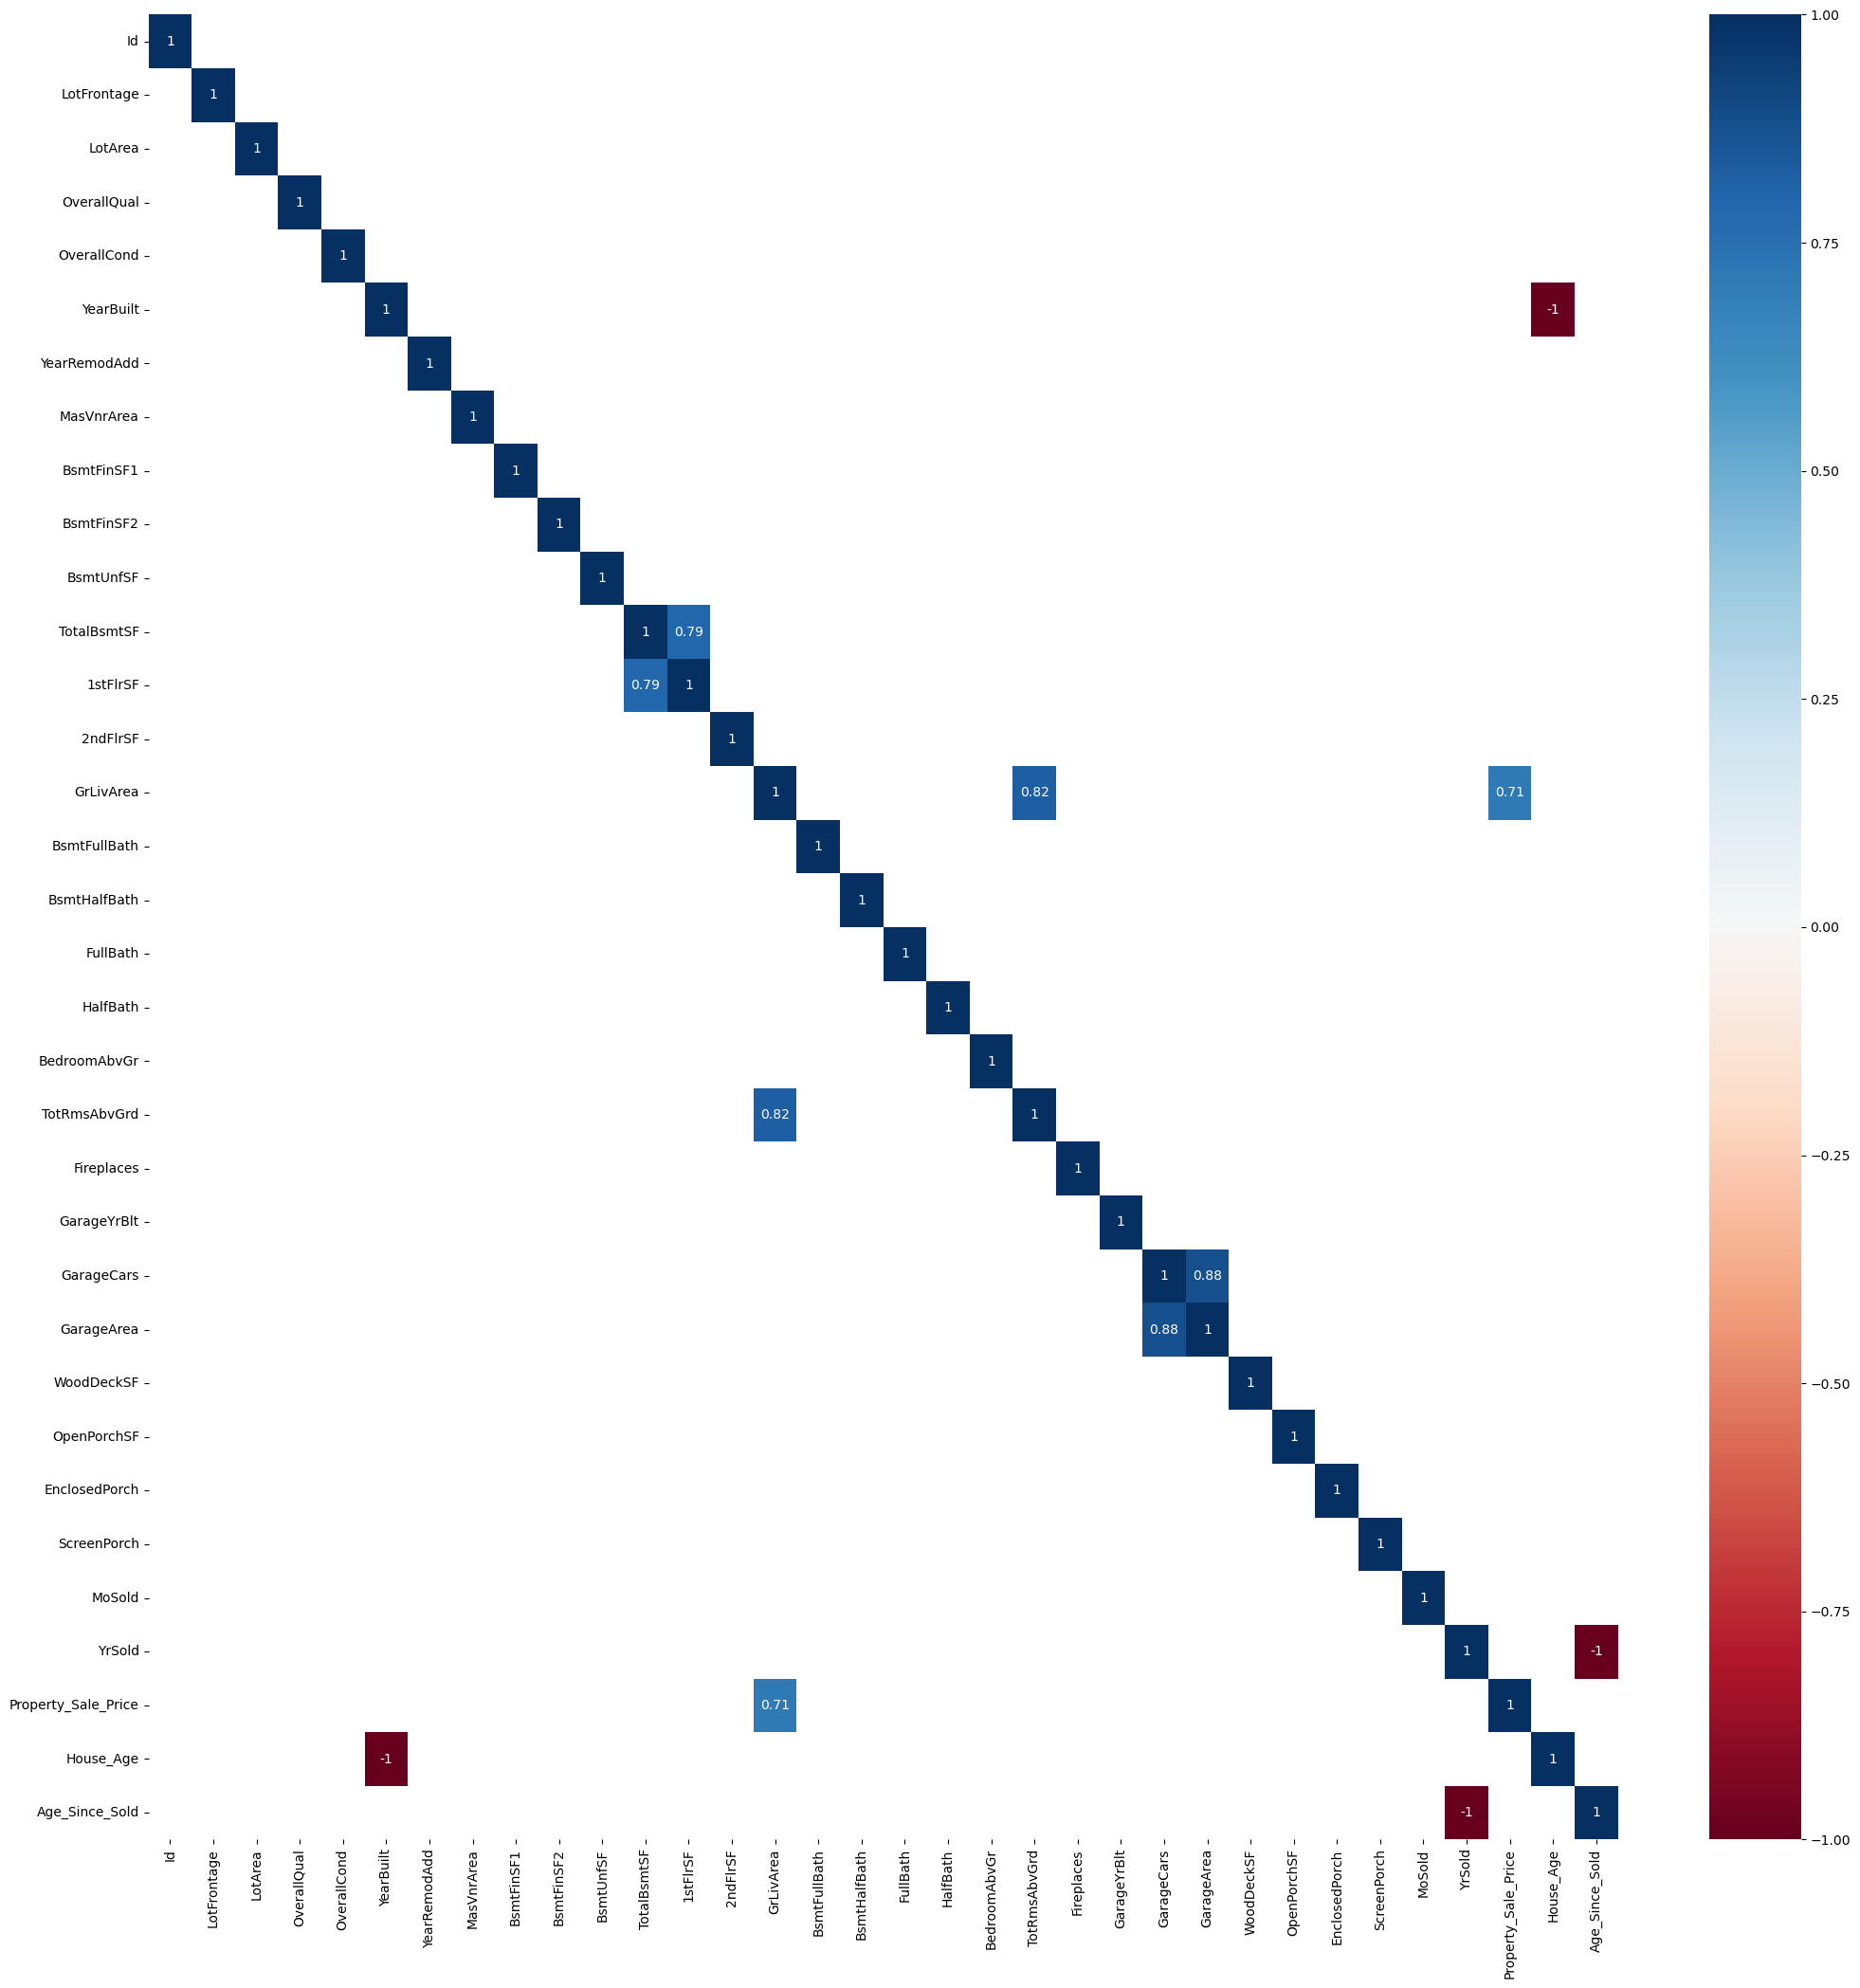

In [61]:
corr = df[num_cols].corr()
plt.figure(figsize=(25,25))
# threshold = 0.7
sns.heatmap(corr[abs(corr)>=0.7], annot=True,cmap='RdBu')
plt.show()

#### Inference 
garage Crs and garage areas = 0.79 <br>
totalbsmtsf nd 1stflrsf 0.79 <br>
GrLivArea and totlrmsabvgrd = 0.82<br>


In [62]:
df.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1,inplace=True)

In [63]:
num_cols = df.dtypes[df.dtypes != 'object'].index
print(num_cols)
print(df.shape)

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price', 'House_Age', 'Age_Since_Sold'],
      dtype='object')
(2060, 64)


#### Outliers Treatment

In [64]:
print(len(num_cols))


31


In [65]:
proper_num_feat = []
for i in num_cols:
    if df[i].nunique()>12:
        proper_num_feat.append(i)
        

In [66]:
print(len(num_cols),len(proper_num_feat))

31 20


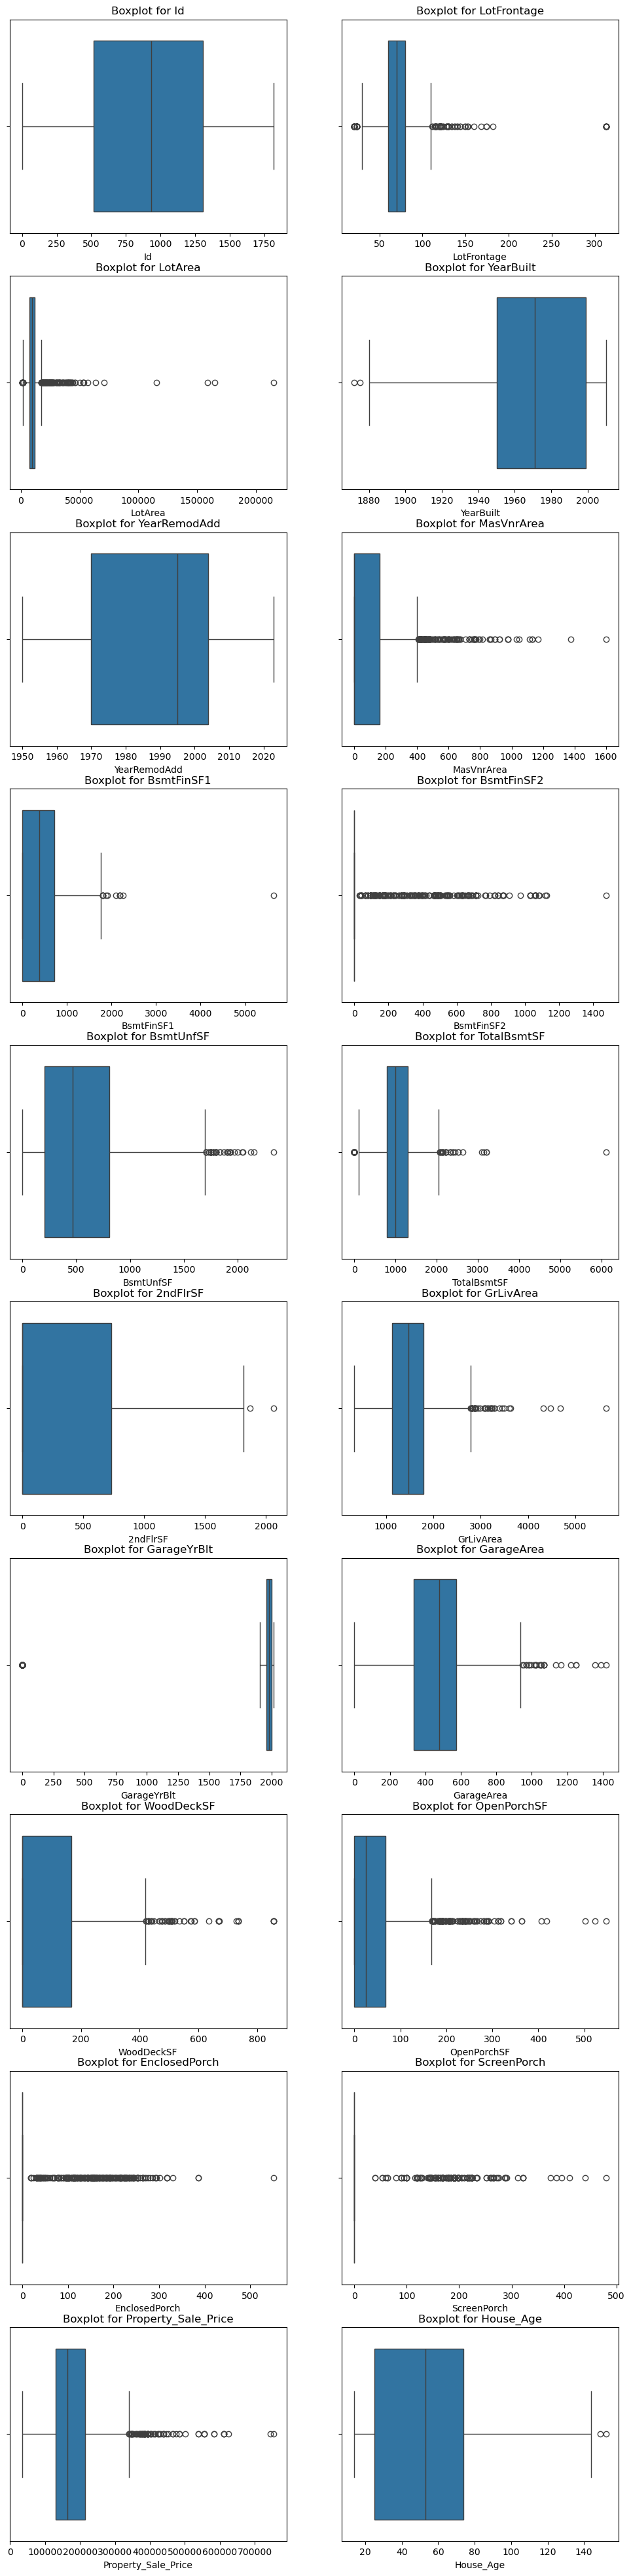

In [67]:
plt.figure(figsize=(12,50))
for i in range(len(proper_num_feat)):
    plt.subplot(10,2,i+1)
    sns.boxplot(x=df[proper_num_feat[i]])
    plt.title(f'Boxplot for {proper_num_feat[i]}')
plt.show()


#### Outliers Treatment Method
#### Method 1: Remove all the outliers
1) outliers > Q3+1.5*IQR
2) outliers > Q1-1.5*IQR

#### Method 2: Remove extreme outliers
1) Outlier Clipping/capping(to replace the outliers with percentile values so that extreme outliers can be brought under single cap)<br>
    use percentiles



In [68]:
a1 = df[proper_num_feat[1:]].describe(percentiles = [0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

a1 = a1.iloc[:,3:]
a1

min        1%        2%        3%       5%       50%  \
LotFrontage             21.0     21.00     24.00     32.00     36.0      70.0   
LotArea               1300.0   1881.39   2268.00   2645.00   3675.0    9498.5   
YearBuilt             1872.0   1900.00   1905.18   1910.00   1916.0    1971.0   
YearRemodAdd          1950.0   1950.00   1950.00   1950.00   1950.0    1995.0   
MasVnrArea               0.0      0.00      0.00      0.00      0.0       0.0   
BsmtFinSF1               0.0      0.00      0.00      0.00      0.0     383.0   
BsmtFinSF2               0.0      0.00      0.00      0.00      0.0       0.0   
BsmtUnfSF                0.0      0.00      0.00      0.00      0.0     465.5   
TotalBsmtSF              0.0      0.00      0.00    264.00    483.0     990.0   
2ndFlrSF                 0.0      0.00      0.00      0.00      0.0       0.0   
GrLivArea              334.0    693.59    768.00    803.77    848.0    1470.0   
GarageYrBlt              0.0      0.00      0.00      0.00      0.0    1980.0   
GarageArea               0.0      0.00      0.00      0.00      0.0     480.0   
WoodDeckSF               0.0      0.00      0.00      0.00      0.0       0.0   
OpenPorchSF              0.0      0.00      0.00      0.00      0.0      25.0   
EnclosedPorch            0.0      0.00      0.00      0.00      0.0       0.0   
ScreenPorch              0.0      0.00      0.00      0.00      0.0       0.0   
Property_Sale_Price  34900.0  64500.00  78180.00  82000.00  88000.0  164000.0   
House_Age               14.0     15.00     16.00     17.00     17.0      53.0   

                           95%        97%        98%        99%       max  
LotFrontage             107.00     115.00     121.00     140.41     313.0  
LotArea               20436.65   26095.80   32386.68   40962.31  215245.0  
YearBuilt              2007.00    2007.00    2008.00    2009.00    2010.0  
YearRemodAdd           2008.00    2009.00    2011.82    2017.00    2023.0  
MasVnrArea              448.00     571.46     651.00     778.56    1600.0  
BsmtFinSF1             1238.40    1352.61    1439.28    1572.41    5644.0  
BsmtFinSF2              465.00     562.29     670.00     852.48    1474.0  
BsmtUnfSF              1494.10    1632.00    1694.00    1800.00    2336.0  
TotalBsmtSF            1753.00    1861.84    1944.84    2136.00    6110.0  
2ndFlrSF               1141.05    1238.15    1320.00    1414.00    2065.0  
GrLivArea              2450.00    2620.46    2729.64    3082.00    5642.0  
GarageYrBlt            2007.00    2008.00    2009.00    2010.00    2019.0  
GarageArea              853.00     884.00     902.00     987.92    1418.0  
WoodDeckSF              342.00     394.00     440.64     517.82     857.0  
OpenPorchSF             172.10     208.46     239.64     283.23     547.0  
EnclosedPorch           172.10     214.46     228.00     252.82     552.0  
ScreenPorch             163.10     192.00     219.28     261.23     480.0  
Property_Sale_Price  328000.00  370124.94  392410.00  442567.01  755000.0  
House_Age               108.00     114.00     118.82     124.00     152.0

In [69]:
print(proper_num_feat)

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Property_Sale_Price', 'House_Age']


In [70]:
cols_right_sk = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                 'TotalBsmtSF', '2ndFlrSF',  'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                 'ScreenPorch', 'House_Age','GrLivArea', 'LotArea','Property_Sale_Price']
cols_left_sk = ['GrLivArea', 'LotArea','Property_Sale_Price']

In [71]:
df1 = df.copy()
df2 = df.copy()

In [72]:
for i in cols_right_sk:
    upper = df[i].quantile(0.99)
    df[i]=np.where(df[i]>upper,upper,df[i])

In [73]:
for i in cols_left_sk:
    lower = df[i].quantile(0.01)
    df[i]=np.where(df[i]<lower,lower,df[i])

In [74]:
a1 = df[proper_num_feat[1:]].describe(percentiles = [0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T

a1 = a1.iloc[:,3:]
a1
# the 99% ile alue chamges to max and then new 99%ile is calculated

min          1%        2%        3%       5%  \
LotFrontage             21.00     21.0000     24.00     32.00     36.0   
LotArea               1881.39   1886.4699   2268.00   2645.00   3675.0   
YearBuilt             1872.00   1900.0000   1905.18   1910.00   1916.0   
YearRemodAdd          1950.00   1950.0000   1950.00   1950.00   1950.0   
MasVnrArea               0.00      0.0000      0.00      0.00      0.0   
BsmtFinSF1               0.00      0.0000      0.00      0.00      0.0   
BsmtFinSF2               0.00      0.0000      0.00      0.00      0.0   
BsmtUnfSF                0.00      0.0000      0.00      0.00      0.0   
TotalBsmtSF              0.00      0.0000      0.00    264.00    483.0   
2ndFlrSF                 0.00      0.0000      0.00      0.00      0.0   
GrLivArea              693.59    693.8319    768.00    803.77    848.0   
GarageYrBlt              0.00      0.0000      0.00      0.00      0.0   
GarageArea               0.00      0.0000      0.00      0.00      0.0   
WoodDeckSF               0.00      0.0000      0.00      0.00      0.0   
OpenPorchSF              0.00      0.0000      0.00      0.00      0.0   
EnclosedPorch            0.00      0.0000      0.00      0.00      0.0   
ScreenPorch              0.00      0.0000      0.00      0.00      0.0   
Property_Sale_Price  64500.00  64500.0000  78180.00  82000.00  88000.0   
House_Age               14.00     15.0000     16.00     17.00     17.0   

                          50%        95%        97%        98%          99%  \
LotFrontage              70.0     107.00     115.00     121.00     140.1681   
LotArea                9498.5   20436.65   26095.80   32386.68   40940.2971   
YearBuilt              1971.0    2007.00    2007.00    2008.00    2009.0000   
YearRemodAdd           1995.0    2008.00    2009.00    2011.82    2017.0000   
MasVnrArea                0.0     448.00     571.46     651.00     774.6896   
BsmtFinSF1              383.0    1238.40    1352.61    1439.28    1572.1681   
BsmtFinSF2                0.0     465.00     562.29     670.00     845.7068   
BsmtUnfSF               465.5    1494.10    1632.00    1694.00    1800.0000   
TotalBsmtSF             990.0    1753.00    1861.84    1944.84    2136.0000   
2ndFlrSF                  0.0    1141.05    1238.15    1320.00    1414.0000   
GrLivArea              1470.0    2450.00    2620.46    2729.64    3082.0000   
GarageYrBlt            1980.0    2007.00    2008.00    2009.00    2010.0000   
GarageArea              480.0     853.00     884.00     902.00     985.0172   
WoodDeckSF                0.0     342.00     394.00     440.64     517.3362   
OpenPorchSF              25.0     172.10     208.46     239.64     282.5043   
EnclosedPorch             0.0     172.10     214.46     228.00     252.3362   
ScreenPorch               0.0     163.10     192.00     219.28     260.5043   
Property_Sale_Price  164000.0  328000.00  370124.94  392410.00  441052.4741   
House_Age                53.0     108.00     114.00     118.82     124.0000   

                           max  
LotFrontage             140.41  
LotArea               40962.31  
YearBuilt              2010.00  
YearRemodAdd           2023.00  
MasVnrArea              778.56  
BsmtFinSF1             1572.41  
BsmtFinSF2              852.48  
BsmtUnfSF              1800.00  
TotalBsmtSF            2136.00  
2ndFlrSF               1414.00  
GrLivArea              3082.00  
GarageYrBlt            2019.00  
GarageArea              987.92  
WoodDeckSF              517.82  
OpenPorchSF             283.23  
EnclosedPorch           252.82  
ScreenPorch             261.23  
Property_Sale_Price  442567.01  
House_Age               124.00

In [75]:
cols = ['BsmtFinSF2','EnclosedPorch','ScreenPorch']
for i in cols:
    print(i,df[df[i]==0].shape)

BsmtFinSF2 (1817, 64)
EnclosedPorch (1779, 64)
ScreenPorch (1900, 64)


In [76]:
# 1778/2060

#### Assumptions of LinReg
<pre>
1) Linearity - Scatter Plot
2) No/minimal multicollinearity - VIF
3) No autocorr - Durbin watson test
4) Homoscedasticty / No hetroscedasticty - bresush pagan test
5) No missing values - df.isnull().sum()
6) No/minimal outliers - df.duplicated().sum()
7) Dependent varaiable should be normally dist - hist, box, jarque_bera, shapiro<br>ruted
2) 

In [77]:
from scipy.stats import shapiro

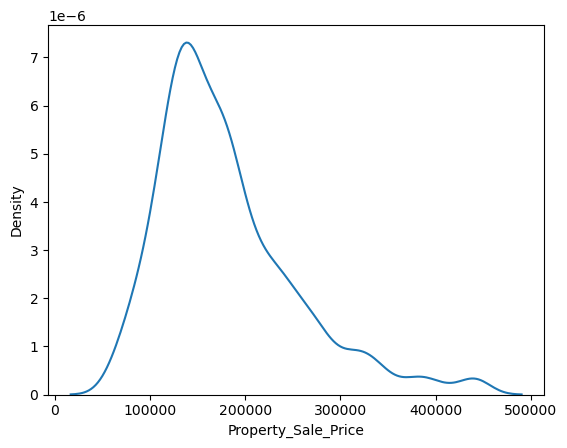

In [78]:
# Ho : Data is Normally Distributed.
# H1 : Data is not Normally Distributed.
sns.kdeplot(df['Property_Sale_Price'])
plt.show()

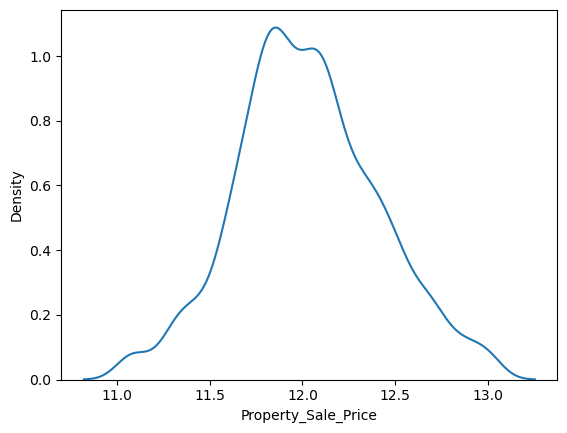

In [79]:
# ?log turns th data into normally distributed
sns.kdeplot(np.log(df['Property_Sale_Price']))
plt.show()

In [80]:
print(shapiro(df['Property_Sale_Price']))
print(shapiro(np.log(df['Property_Sale_Price']))) # the log value is much closer to 0.05 which makes the data normally distributed

ShapiroResult(statistic=0.9108397364616394, pvalue=3.759476685717394e-33)
ShapiroResult(statistic=0.9929954409599304, pvalue=2.383583463938521e-08)


In [81]:
# y = m1x1 + m2x2 + m3x3........ + mnxn

#### Dummy Variable Creations or Encoding Categorical Data

In [82]:
for i in cat_cols:
    print(i,df[i].nunique())
print(len(cat_cols))

Zone_Class 5
Property_Shape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Dwelling_Type 5
HouseStyle 8
RoofStyle 6
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
SaleType 9
SaleCondition 6
33


In [83]:
cat_cols

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price', 'House_Age', 'Age_Since_Sold'],
      dtype='object')

In [85]:
# exterior2nd and neighbourhood have been removed
cols_to_encode = ['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [86]:
df_dum = pd.get_dummies(data = df,columns=cols_to_encode,
                        dtype=int,drop_first=True) #drop_first=True removes the first clumn and then works on other
print(df_dum.shape)
print(df_dum.columns)

(2060, 169)
Index(['Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior2nd', 'MasVnrArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=169)


#### Select X and Y
x = Independet Variable<br>
y = Dependent Variable

In [87]:
df_dum.dtypes.value_counts()


int32      136
float64     17
int64       14
object       2
Name: count, dtype: int64

In [88]:
x = df_dum.drop(['Id','Neighborhood','Exterior2nd','YearBuilt','YrSold','Property_Sale_Price'],axis=1)
y = np.log(df_dum['Property_Sale_Price'])
print(x.shape)
print(y.shape)

(2060, 163)
(2060,)


#### Check Multicollinearity

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending =False)
vif

Feature       VIF
135    GarageFinish_No Garage       inf
84       BsmtQual_No Basement       inf
134      GarageType_No Garage       inf
140      GarageQual_No Garage       inf
97   BsmtFinType1_No Basement       inf
..                        ...       ...
153            SaleType_ConLI  1.166508
151              SaleType_Con  1.124133
81            Foundation_Wood  1.108326
39              LotConfig_FR3  1.090484
49            Condition1_RRNe  1.075748

[163 rows x 2 columns]

In [92]:
print(np.__version__)

1.26.4


In [93]:
feat_with_high_vif = vif['Feature'][vif['VIF']==np.inf].values

In [94]:
x = x.drop(feat_with_high_vif,axis = 1)

In [95]:
print(x.shape)

(2060, 156)


In [96]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending =False)
vif

Feature          VIF
140    GarageCond_TA  2983.551282
136    GarageQual_TA  2329.184489
4       YearRemodAdd  2239.315101
18       GarageYrBlt  1054.050121
76      ExterCond_TA   663.371128
..               ...          ...
146   SaleType_ConLI     1.166135
144     SaleType_Con     1.123902
81   Foundation_Wood     1.108279
39     LotConfig_FR3     1.089004
49   Condition1_RRNe     1.075744

[156 rows x 2 columns]

In [97]:
feat_with_high_vif2 = vif['Feature'][vif['VIF']>1000].values
feat_with_high_vif2

array(['GarageCond_TA', 'GarageQual_TA', 'YearRemodAdd', 'GarageYrBlt'],
      dtype=object)

In [98]:
x = x.drop(feat_with_high_vif2,axis = 1)

In [99]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending =False)
vif.head(15)
#  there is no need to do vif one more time with this model here and nw OLS wwill check from hee but only one o these 2 shal be used

Feature         VIF
8                  TotalBsmtSF  606.764231
74                ExterCond_TA  455.731559
7                    BsmtUnfSF  221.590934
24              Age_Since_Sold  173.703217
5                   BsmtFinSF1  160.804440
27               Zone_Class_RL  153.342363
118             Functional_Typ  151.284995
10                   GrLivArea  127.751171
60             RoofStyle_Gable  120.566464
100           BsmtFinType2_Unf  118.463814
66            MasVnrType_Other   74.401750
72                ExterCond_Gd   56.281809
144               SaleType_New   51.828122
151      SaleCondition_Partial   49.652124
121  FireplaceQu_No fire place   48.477720

#### OLS MODEL

#### OLS MODEL 1

In [100]:
import statsmodels.api as sm

In [101]:
x1 = x.copy()
y1 = y.copy()

In [102]:
x1 = sm.add_constant(x1) #to generate intercept
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.913
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     131.0
Date:                 Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                         23:37:20   Log-Likelihood:                 1561.9
No. Observations:                 2060   AIC:                            -2818.
Df Residuals:                     1907   BIC:                            -1956.
Df Model:                          152                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        10.6644      0.129     82.922      0.000      10.412      10.917
LotFrontage                   0.0002      0.000      1.332      0.183      -0.000       0.001
LotArea                    3.042e-07   5.58e-07      0.545      0.586    -7.9e-07     1.4e-06
OverallQual                   0.0069      0.002      3.177      0.002       0.003       0.011
OverallCond                   0.0146      0.002      6.816      0.000       0.010       0.019
MasVnrArea                 2.689e-06   2.61e-05      0.103      0.918   -4.84e-05    5.38e-05
BsmtFinSF1                -8.399e-05   5.41e-05     -1.551      0.121      -0.000    2.22e-05
BsmtFinSF2                -8.904e-05   6.86e-05     -1.297      0.195      -0.000    4.56e-05
BsmtUnfSF                    -0.0001   5.38e-05     -2.441      0.015      -0.000   -2.58e-05
TotalBsmtSF                   0.0003   5.69e-05      4.698      0.000       0.000       0.000
2ndFlrSF                   7.304e-06   2.44e-05      0.299      0.765   -4.05e-05    5.51e-05
GrLivArea                     0.0003   1.85e-05     14.252      0.000       0.000       0.000
BsmtFullBath                  0.0165      0.008      2.004      0.045       0.000       0.033
BsmtHalfBath                  0.0046      0.013      0.364      0.716      -0.020       0.029
FullBath                      0.0175      0.009      1.994      0.046       0.000       0.035
HalfBath                      0.0287      0.008      3.391      0.001       0.012       0.045
BedroomAbvGr                 -0.0010      0.005     -0.204      0.839      -0.011       0.009
Fireplaces                    0.0134      0.011      1.228      0.220      -0.008       0.035
GarageArea                    0.0002   2.18e-05      7.577      0.000       0.000       0.000
WoodDeckSF                 7.398e-05   2.54e-05      2.915      0.004    2.42e-05       0.000
OpenPorchSF                8.233e-05   5.18e-05      1.588      0.112   -1.93e-05       0.000
EnclosedPorch                 0.0001   5.39e-05      2.383      0.017    2.27e-05       0.000
ScreenPorch                   0.0002   5.68e-05      3.995      0.000       0.000       0.000
MoSold                        0.0010      0.001      0.979      0.328      -0.001       0.003
House_Age                 -8.127e-05      0.000     -0.540      0.590      -0.000       0.000
Age_Since_Sold                0.0009      0.002      0.416      0.678      -0.003       0.005
Zone_Class_FV                 0.3974      0.040      9.950      0.000       0.319       0.476
Zone_Class_RH                 0.3763      0.045      8.331      0.000       0.288       0.465
Zone_Class_RL                 0.3388      0.038      8.952      0.000       0.265       0.413
Zone_Class_RM                 0.2688      0.038      7.103      

In [103]:
print('OLS_M1')
print('R2',ols_m1.rsquared)
print('Adj_R2',ols_m1.rsquared_adj)


OLS_M1
R2 0.9126166780645196
Adj_R2 0.9056516728551893


In [104]:
# to calculate the features which can be dropped
feat_high_p_ols_m1 = ols_m1.pvalues[ols_m1.pvalues>=0.8].index
feat_high_p_ols_m1

Index(['MasVnrArea', 'BedroomAbvGr', 'LotConfig_FR3', 'RoofStyle_Mansard',
       'BsmtExposure_Mn', 'BsmtFinType2_GLQ', 'BsmtFinType2_Unf',
       'FireplaceQu_Fa', 'FireplaceQu_Po'],
      dtype='object')

#### OLS MODEL2

In [105]:
x2 = x.drop(['MasVnrArea', 'BedroomAbvGr', 'LotConfig_FR3', 'RoofStyle_Mansard',
       'BsmtExposure_Mn', 'BsmtFinType2_GLQ', 'BsmtFinType2_Unf',
       'FireplaceQu_Fa', 'FireplaceQu_Po'],axis=1)
y2 = y.copy()

In [106]:
x2 = sm.add_constant(x2) #to generate intercept
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.913
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     139.9
Date:                 Sat, 14 Sep 2024   Prob (F-statistic):               0.00
Time:                         23:37:21   Log-Likelihood:                 1561.7
No. Observations:                 2060   AIC:                            -2835.
Df Residuals:                     1916   BIC:                            -2025.
Df Model:                          143                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        10.6612      0.119     89.244      0.000      10.427      10.895
LotFrontage                   0.0002      0.000      1.322      0.186      -0.000       0.001
LotArea                    3.046e-07   5.55e-07      0.548      0.583   -7.85e-07    1.39e-06
OverallQual                   0.0070      0.002      3.200      0.001       0.003       0.011
OverallCond                   0.0146      0.002      6.852      0.000       0.010       0.019
BsmtFinSF1                -8.482e-05   5.38e-05     -1.577      0.115      -0.000    2.07e-05
BsmtFinSF2                -8.553e-05   6.23e-05     -1.373      0.170      -0.000    3.66e-05
BsmtUnfSF                    -0.0001   5.33e-05     -2.484      0.013      -0.000   -2.79e-05
TotalBsmtSF                   0.0003   5.62e-05      4.771      0.000       0.000       0.000
2ndFlrSF                   7.627e-06   2.38e-05      0.320      0.749   -3.91e-05    5.44e-05
GrLivArea                     0.0003   1.83e-05     14.421      0.000       0.000       0.000
BsmtFullBath                  0.0164      0.008      2.013      0.044       0.000       0.032
BsmtHalfBath                  0.0044      0.013      0.350      0.727      -0.020       0.029
FullBath                      0.0172      0.009      2.015      0.044       0.000       0.034
HalfBath                      0.0287      0.008      3.424      0.001       0.012       0.045
Fireplaces                    0.0137      0.011      1.268      0.205      -0.008       0.035
GarageArea                    0.0002   2.14e-05      7.776      0.000       0.000       0.000
WoodDeckSF                 7.344e-05   2.52e-05      2.913      0.004     2.4e-05       0.000
OpenPorchSF                8.217e-05   5.12e-05      1.605      0.109   -1.82e-05       0.000
EnclosedPorch                 0.0001   5.36e-05      2.419      0.016    2.45e-05       0.000
ScreenPorch                   0.0002   5.65e-05      4.015      0.000       0.000       0.000
MoSold                        0.0010      0.001      0.982      0.326      -0.001       0.003
House_Age                 -7.991e-05      0.000     -0.534      0.594      -0.000       0.000
Age_Since_Sold                0.0009      0.002      0.409      0.683      -0.003       0.005
Zone_Class_FV                 0.3972      0.040      9.981      0.000       0.319       0.475
Zone_Class_RH                 0.3756      0.045      8.361      0.000       0.288       0.464
Zone_Class_RL                 0.3385      0.038      8.987      0.000       0.265       0.412
Zone_Class_RM                 0.2685      0.038      7.128      0.000       0.195       0.342
Property_Shape_IR2            0.0471      0.018      2.672      0.008       0.013       0.082
Property_Shape_IR3           -0.0916      0.035     -2.650      

In [107]:
print('OLS_M1')
print('R2',ols_m1.rsquared)
print('Adj_R2',ols_m1.rsquared_adj)

print('OLS_M2')
print('R2',ols_m2.rsquared)
print('Adj_R2',ols_m2.rsquared_adj)


OLS_M1
R2 0.9126166780645196
Adj_R2 0.9056516728551893
OLS_M2
R2 0.912605688401869
Adj_R2 0.9060830440602547


In [108]:
# after dropping a few fetres th fittness of good improved and and from here we work further

#### Linear Regression

In [109]:
x3 = x.drop(feat_high_p_ols_m1,axis = 1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(2060, 143)
(2060,)


#### Split the data into train and test

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size=0.30,random_state=57)


In [112]:
x_train.head()

LotFrontage  LotArea  OverallQual  OverallCond  BsmtFinSF1  BsmtFinSF2  \
576          52.0   6292.0            7            7         0.0         0.0   
1098         50.0   6000.0            4            6       672.0         0.0   
1137         54.0   6342.0            5            8         0.0         0.0   
1456         85.0  13175.0            4            6       790.0       163.0   
707          48.0   6240.0            8            5       863.0         0.0   

      BsmtUnfSF  TotalBsmtSF  2ndFlrSF  GrLivArea  ...  SaleType_ConLI  \
576       861.0        861.0     600.0     1477.0  ...               0   
1098        0.0        672.0     567.0     1324.0  ...               0   
1137      780.0        780.0     240.0     1020.0  ...               0   
1456      589.0       1542.0       0.0     2073.0  ...               0   
707       461.0       1324.0       0.0     1324.0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
576                0             0             0            1   
1098               0             0             0            1   
1137               0             0             0            1   
1456               0             0             0            1   
707                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
576                       0                     0                     0   
1098                      0                     0                     0   
1137                      0                     0                     0   
1456                      0                     0                     0   
707                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
576                      1                      0  
1098                     1                      0  
1137                     1                      0  
1456                     1                      0  
707                      1                      0  

[5 rows x 143 columns]

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [114]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(np.exp(ytest),np.exp(ypred)) #orginal scale as y was in log
    mse = mean_squared_error(np.exp(ytest),np.exp(ypred))#orginal scale as y was in log
    rmse = np.sqrt(mse)#orginal scale as y was in log
    r2 = r2_score(ytest,ypred) #log scale
    print('MAE',mae,'MSE',mse,'RMSE',rmse)
    print('Test_R2',r2)

#### Model Training

In [115]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

#### Generate Predicitions and Evaluate Model

#### Fetch Coeff and Intercept

In [116]:
m_lr = lr1.coef_
c_lr = lr1.intercept_
print('Coef',len(m_lr),m_lr)
print('Intercept',len(c_lr),c_lr)

Coef 143 [ 2.29231700e-04  3.60377958e-08  6.36733438e-03  1.37317618e-02
 -8.34376777e-05 -5.91767034e-05 -1.26481951e-04  2.35748310e-04
 -2.22036506e-05  2.76616850e-04  2.19135867e-02  7.74474443e-03
  1.79588740e-02  3.43829977e-02  2.51531400e-02  1.61717780e-04
  6.30622012e-05  4.69920241e-05  1.34562849e-04  2.02904163e-04
  1.67493391e-03  1.52741515e-05  2.29912184e-03  4.18698337e-01
  4.04284023e-01  3.65163251e-01  2.91025443e-01  3.08877997e-02
 -1.97041648e-01 -1.12888578e-02  9.96362361e-02  8.65541816e-02
  5.30001173e-02  3.41418746e-02 -2.50068214e-02 -2.25848270e-03
  1.83539719e-02  6.19887492e-02  1.98133963e-02  9.38667987e-02
  9.12327329e-02  1.81892552e-02  6.28404839e-02  9.31670547e-02
  2.43390308e-02  1.37670418e-01 -8.66358338e-02 -9.57488361e-02
 -1.10747087e-01 -5.14521311e-02  5.89551584e-02  2.23584325e-03
 -3.84102752e-02  3.43766095e-02 -4.49737205e-03 -4.07687798e-02
 -7.16037190e-03  7.34513754e-03  4.56884646e-02  4.84046543e-03
 -1.82723805e-01

TypeError: object of type 'numpy.float64' has no len()

In [117]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 15981.212407075664 MSE 515145755.61142015 RMSE 22696.82258844661
Test_R2 0.8962973036716912


In [118]:
print('Train Score',lr1.score(x_train,y_train)) # train r2 score
print('Test Score',lr1.score(x_test,y_test)) #test r2 score

Train Score 0.9123162212578342
Test Score 0.8962973036716912


In [119]:
pred_res = pd.DataFrame({'Actual':np.exp(y_test),"Pred":np.exp(ypred_lr1)})
pred_res.head()

Actual           Pred
1560  128950.0  118509.192556
866   248900.0  263625.397531
836   153500.0  146114.344335
953   172000.0  183130.966696
623   168500.0  184956.900569

#### Overfitting
1) when model performs well on train data and compartively poorly on test data
2) indicates high variance and low bias

#### Underfitting
1) when model performs well on test data and compartively poorly on train data
2) indicates low variance and high bias

#### Methods of treating overfittng
1)<b> Regularisaion<br></b>
Bias is added to reduce high variance. Penalty term imposes bias.<br>
  a) Ridge(L2 Regularisation): <br>
      Cost Function = MSE + alpha * sum((m)^2)<br>
      Cost FUnction = (1/n) * (sum(m * xi+c)^2) + alpha * sum((m)^2)<br>
      Model Coeff are reduced <br>
  b) Lasso(L1 Regularisation)<br>
      Cost Function = MSE + alpha * sum(|m|)<br>
      Cost FUnction = (1/n) * (sum(m*xi+c)^2) +  alpha * sum(|m|)<br>
      Some model coef will become 0 which degrades it performance. This helps in feature selection <br>
2)<b> Cross Validation<br></b>
  a) helps to reduce over fitting<br>
  b) used to check if model is rohbust accross different splits <br>

#### Treatment of Overfitting

In [120]:
from sklearn.linear_model import Ridge,Lasso

#### 1) Ridge

In [121]:
rid1 = Ridge(alpha=3.5)
rid1.fit(x_train,y_train)


Ridge(alpha=3.5)

In [122]:
print('LinReg')
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))
print('Ridge')
print('Train Score',rid1.score(x_train,y_train))
print('Test Score',rid1.score(x_test,y_test))

LinReg
Train Score 0.9123162212578342
Test Score 0.8962973036716912
Ridge
Train Score 0.9079594778120175
Test Score 0.9046187750689642


In [123]:
las1 = Lasso(alpha=15.76)
las1.fit(x_train,y_train)


Lasso(alpha=15.76)

In [124]:
print('LinReg')
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))
print('Ridge')
print('Train Score',las1.score(x_train,y_train))
print('Test Score',las1.score(x_test,y_test))

LinReg
Train Score 0.9123162212578342
Test Score 0.8962973036716912
Ridge
Train Score 0.7010696969858454
Test Score 0.6975411718472342


In [125]:
m1_l = las1.coef_
c1_l = las1.intercept_
print('Coef',m1_l)
print('Intercept',c1_l)

Coef [ 0.00000000e+00  2.60500000e-06  0.00000000e+00  0.00000000e+00
  3.31984361e-05 -0.00000000e+00  0.00000000e+00  2.87435676e-04
  0.00000000e+00  3.61958426e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.45850120e-04
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.

#### Cross Validtion

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
lr_base = LinearRegression()
# cv = Cross validation
scores = cross_val_score(lr_base,x,y,cv=5,scoring='r2')
print(scores)
print('Avg_Score',np.mean(scores))

[0.88939613 0.86417434 0.9058752  0.85888317 0.88534886]
Avg_Score 0.8807355416329015


#### Model Saving

In [128]:
import pickle

#### Save the model (Serialisation)
wb - write binary<br>
rb - read binary

In [129]:
pickle.dump(rid1,open('Ridge_Model_House_pric_9july.pkl','wb'))
pickle.dump(lr1,open('LinReg_Model_House_pric_9july.pkl','wb'))

In [130]:
print(x_train.shape)

(1442, 143)


#### Load the model (Deserialisation)

In [131]:
ridge_model = pickle.load(open('Ridge_Model_House_pric_9july.pkl','rb'))

In [132]:
print(x_test.iloc[34].shape)
print(x_test.iloc[34].values.reshape(1,143).shape)
print(x_test.shape)

(143,)
(1, 143)
(618, 143)


In [133]:
np.exp(ridge_model.predict(x_test.iloc[416].values.reshape(1,143)))

array([128778.06471105])